### Kh·ªüi t·∫°o post_df v√† replies_df

In [2]:
import pandas as pd
import numpy as np
import json 
from dateutil.parser import isoparser
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
posts_df = pd.read_csv("cleaned_posts.csv")
replies_df = pd.read_csv('cleaned_replies.csv')

### Ph√¢n t√≠ch n·ªôi dung thu·∫ßn


#### 1. S·ª≠ d·ª•ng `wordcloud` ƒë·ªÉ bi·ªÖu di·ªÖn c∆° b·∫£n v·ªÅ nh·ªØng `keyword` s·∫Ω xu·∫•t hi·ªán trong b√†i ƒëƒÉng c·ªßa ng∆∞·ªùi d√πng.


In [3]:
from collections import Counter
import re
from nltk import ngrams

# K·∫øt h·ª£p t·∫•t c·∫£ vƒÉn b·∫£n t·ª´ c·ªôt 'originalContent'
all_text = " ".join(content for content in posts_df.originalContent)

# Chuy·ªÉn t·∫•t c·∫£ vƒÉn b·∫£n th√†nh ch·ªØ th∆∞·ªùng v√† lo·∫°i b·ªè c√°c k√Ω t·ª± ƒë·∫∑c bi·ªát
all_text = re.sub(r'\W+', ' ', all_text.lower())

# T√°ch vƒÉn b·∫£n th√†nh c√°c t·ª´ ri√™ng l·∫ª
words = all_text.split()

# T·∫°o c√°c bigrams (c·∫∑p t·ª´)
bigrams = ngrams(words, 2)

# ƒê·∫øm t·∫ßn su·∫•t xu·∫•t hi·ªán c·ªßa c√°c bigrams
bigram_counts = Counter(bigrams)

# Chuy·ªÉn ƒë·ªïi k·∫øt qu·∫£ th√†nh dataframe ƒë·ªÉ d·ªÖ d√†ng x·ª≠ l√Ω
bigram_counts_df = pd.DataFrame(bigram_counts.items(), columns=['bigram', 'count']).sort_values(by='count', ascending=False)

# Hi·ªÉn th·ªã 20 bigrams ph·ªï bi·∫øn nh·∫•t
bigram_counts_df.head(20)

bigram  count
511    (th·ªã, tr∆∞·ªùng)  33382
36       (c·ªï, phi·∫øu)  28756
1371       (ƒë·∫ßu, t∆∞)  18350
546        (c√≥, th·ªÉ)  14908
296     (giao, d·ªãch)  13278
487   (ch·ª©ng, kho√°n)  11266
1744       (anh, em)  10454
402       (h√¥m, nay)  10278
955        (h·ªó, tr·ª£)   9684
565      (ti·∫øp, t·ª•c)   9382
1450      (t·ª∑, ƒë·ªìng)   9352
2021    (l·ª£i, nhu·∫≠n)   7765
3322       (so, v·ªõi)   7763
1457      (nh√†, ƒë·∫ßu)   7731
1891      (con, n√†y)   7590
304   (thanh, kho·∫£n)   7391
3295     (xu, h∆∞·ªõng)   7265
425     (d√≤ng, ti·ªÅn)   7171
4002    (ng√¢n, h√†ng)   7001
1611  (tƒÉng, tr∆∞·ªüng)   6879

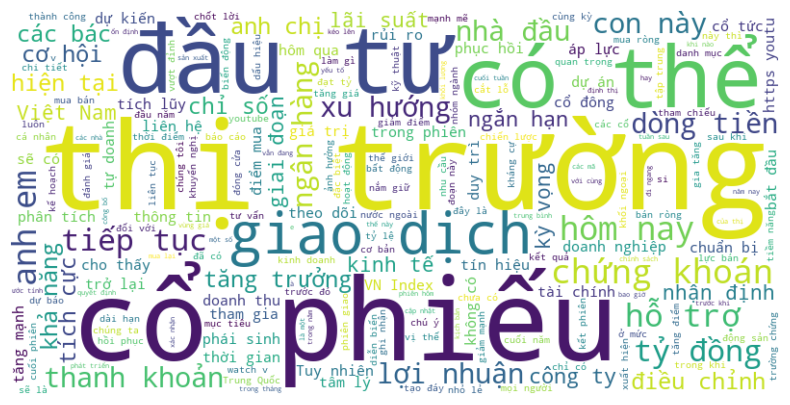

In [4]:

# K·∫øt h·ª£p t·∫•t c·∫£ vƒÉn b·∫£n t·ª´ c·ªôt 'originalContent'
text = " ".join(content for content in posts_df.originalContent)

# T·∫°o wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Nh·∫≠n x√©t:
- Ngo√†i `c·ªï phi·∫øu`, `giao d·ªãch`, `th·ªã tr∆∞·ªùng` th√¨ c√≥ 1 s·ªë keyword ƒë√°ng ch√∫ √Ω l√† `thanh kho·∫£n`, `ƒëi·ªÉm mua`, `k·ª≥ v·ªçng` l√† nh·ªØng keyword ƒë√°ng ch√∫ √Ω.

#### 2. ƒê·∫∑t v·∫•n ƒë·ªÅ v·ªÅ nh·ªØng y·∫øu t·ªë ph√¢n t√≠ch ƒë∆∞·ª£c c√≥ xu·∫•t hi·ªán trong n·ªôi dung c·ªßa c√°c b√†i vi·∫øt. 

ƒê·ªÉ ph√¢n t√≠ch ta s·∫Ω s·ª≠ d·ª•ng th∆∞ vi·ªán `re` ƒë·ªÉ t√¨m c√°c ƒë∆∞·ªùng link trong c·ªôt `originalContent` c·ªßa dataframe `posts_df`.

In [5]:

import re

# T√¨m t·∫•t c·∫£ c√°c ƒë∆∞·ªùng link trong c·ªôt 'originalContent'
posts_df['links'] = posts_df['originalContent'].apply(lambda x: re.findall(r'(https?://\S+)', x))

# Chuy·ªÉn sentiment t·ª´ d·∫°ng s·ªë sang string
posts_df['sentiment'] = posts_df['sentiment'].astype('string')
posts_df['sentiment'] = posts_df['sentiment'].replace({'1': 'positive', '0': 'neutral', '-1': 'negative'})

# T·∫°o m·ªôt dataframe m·ªõi ch·ªâ ch·ª©a c√°c b√†i vi·∫øt c√≥ ƒë∆∞·ªùng link
links_df = posts_df.explode('links')[['date', 'postID', 'links', 'sentiment']].dropna().reset_index(drop=True)

links_df
# Tr√≠ch xu·∫•t lo·∫°i links t·ª´ c·ªôt 'links'
links_df['links'] = links_df['links'].apply(lambda x: x.replace('youtu.be', 'youtube.com') if 'youtu.be' in x else x)
links_df['link_type'] = links_df['links'].apply(lambda x: re.search(r'https?://(?:www\.)?([^/]+)', x).group(1) if re.search(r'https?://(?:www\.)?([^/]+)', x) else None)

links_df


date    postID  \
0      2024-11-06T21:38:45.743+07:00  29104016   
1      2024-11-06T21:38:26.107+07:00  29104004   
2       2024-11-06T21:35:57.05+07:00  29103932   
3       2024-11-06T21:33:38.58+07:00  29103860   
4      2024-11-06T21:28:34.473+07:00  29103739   
...                              ...       ...   
10648   2024-09-06T10:17:02.76+07:00  28009227   
10649  2024-09-06T10:14:16.993+07:00  28009092   
10650  2024-09-06T10:12:48.367+07:00  28009016   
10651  2024-09-06T10:11:00.183+07:00  28008910   
10652   2024-09-06T10:00:14.72+07:00  28008342   

                                                   links sentiment  \
0      https://www.youtube.com/live/rfLkHPX-CJo?si=5x...   neutral   
1      https://chungkhoannhatrang.vn/khanh-hoa-ban-ha...   neutral   
2      https://youtube.com/shorts/rH3OON8pU2A?si=8wCa...   neutral   
3      https://www.youtube.com/watch?v=5Aj7jDO1VSY&t=11s  positive   
4      https://youtube.com/clip/UgkxkjaCQ0bGfS64zvuSt...   neutral   
...                                                  ...       ...   
10648  https://youtube.com/live/aIB78pZQilg?feature=s...   neutral   
10649  https://f247.com/t/hpg-cho-doi-lan-gio-chinh-s...   neutral   
10650  https://youtube.com/wERiDcK2BNA?si=aa3TpE65HYR...   neutral   
10651  https://f247.com/t/vn-index-dung-de-nghi-ngo-l...   neutral   
10652  https://vietnambiz.vn/hai-du-an-cua-becamex-id...   neutral   

                   link_type  
0                youtube.com  
1      chungkhoannhatrang.vn  
2                youtube.com  
3                youtube.com  
4                youtube.com  
...                      ...  
10648            youtube.com  
10649               f247.com  
10650            youtube.com  
10651               f247.com  
10652          vietnambiz.vn  

[10653 rows x 5 columns]

M√£ tr√™n s·∫Ω t·∫°o m·ªôt dataframe `links_df` ch·ª©a c√°c ƒë∆∞·ªùng link v√† m√£ b√†i vi·∫øt t∆∞∆°ng ·ª©ng.

In [6]:
# L·∫≠p b·∫£ng th·ªëng k√™ s·ªë l∆∞·ª£ng links theo lo·∫°i
link_type_counts = links_df['link_type'].value_counts().reset_index()
link_type_counts.columns = ['link_type', 'count']
link_type_counts

link_type  count
0             youtube.com   7899
1           vt.tiktok.com    334
2              baomoi.com    269
3              fireant.vn    185
4                f247.com    149
..                    ...    ...
363               soha.vn      1
364  finance.vietstock.vn      1
365      ximangsaison.com      1
366      onsenfuji.com.vn      1
367          baolaocai.vn      1

[368 rows x 2 columns]

In [7]:
import plotly.express as px

# L·∫•y 5 lo·∫°i link ph·ªï bi·∫øn nh·∫•t
top_5_links = link_type_counts['link_type'][:5].tolist()

# Thay th·∫ø c√°c lo·∫°i link √≠t ph·ªï bi·∫øn b·∫±ng 'others'
links_df['link_type'] = links_df['link_type'].apply(lambda x: x if x in top_5_links else 'others')

# T·∫°o pie chart c·∫£i ti·∫øn
fig = px.pie(
    link_type_counts[:5], 
    values='count', 
    names='link_type', 
    title='Top 5 Link Types by Appearance',
    color_discrete_sequence=px.colors.sequential.RdBu,  # Ch·ªçn b·∫£ng m√†u ƒë·∫πp m·∫Øt
    hole=0.5  # Bi·ªÉu ƒë·ªì d·∫°ng Donut
)

# T√πy ch·ªânh hi·ªÉn th·ªã
fig.update_traces(
    textinfo='percent+label',  # Hi·ªÉn th·ªã c·∫£ t√™n v√† ph·∫ßn trƒÉm
    hoverinfo='label+percent+value',  # Chi ti·∫øt khi di chu·ªôt
    pull=[0.1, 0, 0, 0, 0]  # L√†m n·ªïi b·∫≠t lo·∫°i link c√≥ t·∫ßn su·∫•t cao nh·∫•t
)

fig.update_layout(
    title=dict(
        text='Top 5 Link Types by Appearance',
        font=dict(size=20, family='Arial', color='black', weight='bold'),
        x=0.5,  # CƒÉn gi·ªØa ti√™u ƒë·ªÅ
        y= 0.98
    ),
    legend=dict(
        title="Link Types",
        font=dict(size=14),
        orientation="h",  # Hi·ªÉn th·ªã ch√∫ th√≠ch ngang
        x=0.5,
        xanchor="center",
        y=-0.1  # V·ªã tr√≠ d∆∞·ªõi bi·ªÉu ƒë·ªì
    )
)

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
fig.show()



C√≥ th·ªÉ th·∫•y r·∫±ng ƒëa s·ªë c√°c li√™n k·∫øt trong b√†i vi·∫øt ƒë·ªÅu d·∫´n ƒë·∫øn c√°c trang web b√™n ngo√†i, trong ƒë√≥ c√≥ nhi·ªÅu li√™n k·∫øt ƒë·∫øn `youtube.com`.

V·∫≠y ta c√≥ th·ªÉ k·∫øt lu·∫≠n r·∫±ng ng∆∞·ªùi d√πng th∆∞·ªùng chia s·∫ª c√°c li√™n k·∫øt ƒë·∫øn c√°c trang web b√™n ngo√†i nh∆∞ `youtube.com` trong c√°c b√†i vi·∫øt c·ªßa m√¨nh.


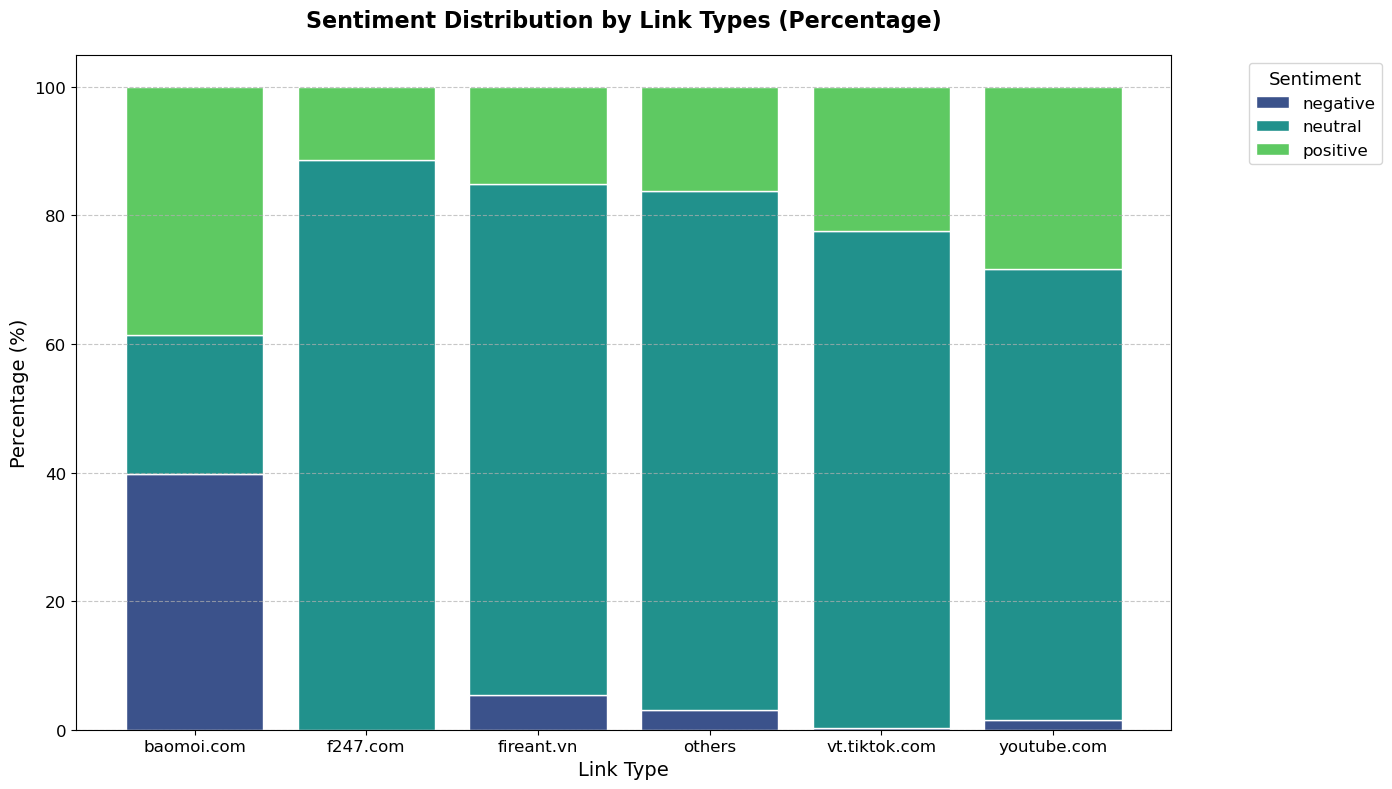

In [8]:
# Chu·∫©n b·ªã d·ªØ li·ªáu
link_sentiment_correlation = links_df.pivot_table(index='link_type', columns='sentiment', aggfunc='size', fill_value=0)
link_sentiment_correlation_percentage = link_sentiment_correlation.div(link_sentiment_correlation.sum(axis=1), axis=0) * 100  # Chu·∫©n h√≥a t·ª∑ l·ªá %
link_sentiment_correlation_percentage = link_sentiment_correlation_percentage.reset_index()

# V·∫Ω bi·ªÉu ƒë·ªì bar chart d·∫°ng t·ª∑ l·ªá ph·∫ßn trƒÉm
plt.figure(figsize=(14, 8))
bar_width = 0.8
bottom_values = pd.Series(0, index=link_sentiment_correlation_percentage.index)

colors = sns.color_palette("viridis", n_colors=len(link_sentiment_correlation_percentage.columns) - 1)
for i, sentiment in enumerate(link_sentiment_correlation_percentage.columns[1:]):  # B·ªè c·ªôt 'link_type'
    plt.bar(
        link_sentiment_correlation_percentage['link_type'],
        link_sentiment_correlation_percentage[sentiment],
        bottom=bottom_values,
        label=sentiment,
        color=colors[i],
        edgecolor='white',
        width=bar_width
    )
    # C·∫≠p nh·∫≠t gi√° tr·ªã bottom
    bottom_values += link_sentiment_correlation_percentage[sentiment]

# C√†i ƒë·∫∑t ti√™u ƒë·ªÅ v√† nh√£n
plt.title('Sentiment Distribution by Link Types (Percentage)', fontsize=16, weight='bold', pad=20)
plt.xlabel('Link Type', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Th√™m ch√∫ th√≠ch
plt.legend(title="Sentiment", title_fontsize=13, fontsize=12, loc='upper right', bbox_to_anchor=(1.2, 1))

# Th√™m gridline nh·∫π
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.tight_layout()
plt.show()


Nh·∫≠n th·∫•y ta c√≥ th·ªÉ ph√¢n t√≠ch t·ªâ l·ªá 3 sentiment c·ªßa c√°c `link_type`. T·ª´ ƒë√≥ l·ª±a ch·ªçn heatmap ƒë·ªÉ th·ªÉ hi·ªán.

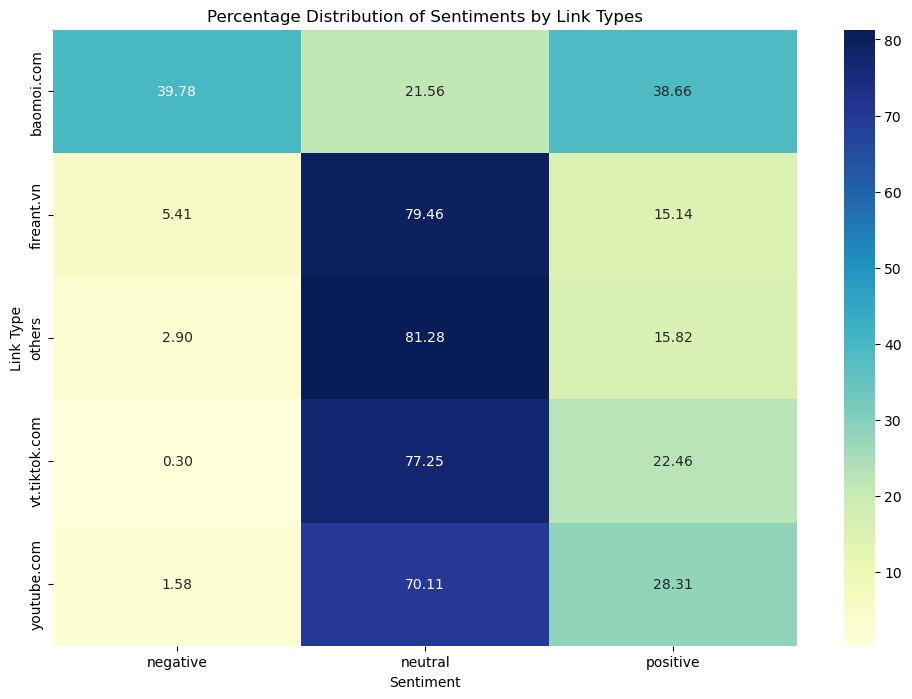

In [9]:
top_4_links = link_type_counts['link_type'][:4].tolist()

# Thay th·∫ø c√°c lo·∫°i link √≠t ph·ªï bi·∫øn b·∫±ng 'others'
links_df['link_type'] = links_df['link_type'].apply(lambda x: x if x in top_4_links else 'others')

# T·∫°o b·∫£ng t∆∞∆°ng quan gi·ªØa c√°c lo·∫°i li√™n k·∫øt v√† sentiment
link_correlation = links_df.pivot_table(index='link_type', columns='sentiment', aggfunc='size', fill_value=0)

# T√≠nh t·ª∑ l·ªá ph·∫ßn trƒÉm
link_correlation_percentage = link_correlation.div(link_correlation.sum(axis=1), axis=0) * 100

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(12, 8))
sns.heatmap(link_correlation_percentage, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Percentage Distribution of Sentiments by Link Types')
plt.xlabel('Sentiment')
plt.ylabel('Link Type')
plt.show()

T·ª´ `Sentiment Distribution by Link Types` v√† `Percentage Distribution of Sentiments by Link Types`, c√≥ th·ªÉ nh·∫≠n x√©t nh∆∞ sau:

1. **Youtube.com**: ƒê√¢y l√† lo·∫°i li√™n k·∫øt ph·ªï bi·∫øn nh·∫•t v√† c√≥ s·ª± ph√¢n b·ªë ƒë·ªÅu gi·ªØa c√°c lo·∫°i sentiment. ƒê·∫∑c bi·ªát, s·ªë l∆∞·ª£ng li√™n k·∫øt c√≥ sentiment t√≠ch c·ª±c (positive) v√† trung l·∫≠p (neutral) chi·∫øm ∆∞u th·∫ø h∆°n so v·ªõi ti√™u c·ª±c (negative).

2. **Vt.tiktok.com**: Lo·∫°i li√™n k·∫øt n√†y ch·ªß y·∫øu c√≥ sentiment trung l·∫≠p v√† t√≠ch c·ª±c, v·ªõi s·ªë l∆∞·ª£ng sentiment trung l·∫≠p chi·∫øm ph·∫ßn l·ªõn.

3. **Baomoi.com**: S·ªë l∆∞·ª£ng li√™n k·∫øt t·ª´ baomoi.com c√≥ sentiment ti√™u c·ª±c v√† t√≠ch c·ª±c g·∫ßn nh∆∞ t∆∞∆°ng ƒë∆∞∆°ng, trong khi sentiment trung l·∫≠p √≠t h∆°n.

4. **Fireant.vn**: Lo·∫°i li√™n k·∫øt n√†y ch·ªß y·∫øu c√≥ sentiment trung l·∫≠p, v·ªõi s·ªë l∆∞·ª£ng sentiment ti√™u c·ª±c v√† t√≠ch c·ª±c √≠t h∆°n.

5. **Others**: C√°c li√™n k·∫øt kh√°c ngo√†i top 4 ch·ªß y·∫øu c√≥ sentiment trung l·∫≠p, nh∆∞ng c≈©ng c√≥ m·ªôt s·ªë l∆∞·ª£ng ƒë√°ng k·ªÉ sentiment t√≠ch c·ª±c v√† ti√™u c·ª±c.

Nh√¨n chung, c√°c li√™n k·∫øt t·ª´ youtube.com v√† vt.tiktok.com v√† fireant.vn c√≥ xu h∆∞·ªõng mang l·∫°i sentiment t√≠ch c·ª±c v√† trung l·∫≠p nhi·ªÅu h∆°n, trong khi c√°c li√™n k·∫øt t·ª´ baomoi.com c√≥ s·ª± ph√¢n b·ªë sentiment ƒëa d·∫°ng h∆°n.

ph√¢n t√≠ch ƒë·ªô li√™n k·∫øt c·ªßa linktype v√† ch·ªâ s·ªë th·ªã tr∆∞·ªùng nh∆∞ VNINDEX, VN30, HNINDEX, UPCOM

c√≥ th·ªÉ l√† th·ªùi ƒëi·ªÉm s·ªë l·∫ßn linktype ( c·ªôt ) xu·∫•t hi·ªán v√† ch·ªâ s·ªë VNINDEX nh∆∞ n√†o ( d·∫°ng line )

In [10]:
# Chuy·ªÉn ƒë·ªïi c·ªôt 'date' sang ƒë·ªãnh d·∫°ng datetime
links_df['date'] = pd.to_datetime(links_df['date'], format='ISO8601')

# T√¥i c·∫ßn 1 df bi·ªÉu di·ªÖn s·ªë l·∫ßn link_type xu·∫•t hi·ªán theo ng√†y
link_type_counts_by_date = links_df.groupby([pd.Grouper(key='date', freq='D'), 'link_type']).size().reset_index()
link_type_counts_by_date.columns = ['date', 'link_type', 'count']

# ƒê·ªãnh d·∫°ng l·∫°i c·ªôt 'date'
link_type_counts_by_date['date'] = link_type_counts_by_date['date'].dt.strftime('%Y-%m-%d')

link_type_counts_by_date


date      link_type  count
0    2024-09-06     baomoi.com      1
1    2024-09-06     fireant.vn      1
2    2024-09-06         others     27
3    2024-09-06  vt.tiktok.com      4
4    2024-09-06    youtube.com     77
..          ...            ...    ...
301  2024-11-06     baomoi.com      2
302  2024-11-06     fireant.vn      4
303  2024-11-06         others     35
304  2024-11-06  vt.tiktok.com      8
305  2024-11-06    youtube.com    170

[306 rows x 3 columns]

In [11]:
# t·∫°o total_link_count_by_date
total_link_counts_by_date = link_type_counts_by_date.groupby('date')['count'].sum().reset_index()


In [12]:
# ƒê·ªçc d·ªØ li·ªáu t·ª´ csv trong folder price
vnindex_prices = pd.read_csv('price/VNINDEX.csv')
vn30_prices = pd.read_csv('price/VN30.csv')
hnxindex_prices = pd.read_csv('price/HNXINDEX.csv')

# Chuy·ªÉn c·ªôt 'date' sang ƒë·ªãnh d·∫°ng datetime
vn30_prices['time'] = pd.to_datetime(vn30_prices['time'], format='%Y-%m-%d %H:%M:%S')
hnxindex_prices['time'] = pd.to_datetime(hnxindex_prices['time'], format='%Y-%m-%d %H:%M:%S')
vnindex_prices['time'] = pd.to_datetime(vnindex_prices['time'], format='%Y-%m-%d %H:%M:%S')

In [13]:
# T·∫°o dataframe m·ªõi ch·ª©a ng√†y v√† gi√° tr·ªã l·ªõn nh·∫•t c·ªßa volume c·ªßa VN30, VNINDEX, HNXINDEX
total_volume_by_date_vn30 = vn30_prices.groupby(vn30_prices['time'].dt.date)['volume'].sum().reset_index()
total_volume_by_date_vnindex = vnindex_prices.groupby(vnindex_prices['time'].dt.date)['volume'].sum().reset_index()
total_volume_by_date_hnxindex = hnxindex_prices.groupby(hnxindex_prices['time'].dt.date)['volume'].sum().reset_index()

# ƒê·ªïi t√™n c√°c c·ªôt cho d·ªÖ hi·ªÉu
total_volume_by_date_vn30.columns = ['date', 'max_volume_vn30']
total_volume_by_date_vnindex.columns = ['date', 'max_volume_vnindex']
total_volume_by_date_hnxindex.columns = ['date', 'max_volume_hnxindex']

# G·ªôp c√°c dataframe l·∫°i v·ªõi nhau
total_volume_by_date_all = total_volume_by_date_vn30.merge(total_volume_by_date_vnindex, on='date').merge(total_volume_by_date_hnxindex, on='date')

total_volume_by_date_all

date  max_volume_vn30  max_volume_vnindex  max_volume_hnxindex
0   2024-09-04        229581631           637198624             48459300
1   2024-09-05        272533061           660978986             42886200
2   2024-09-06        286314832           621685618             43256400
3   2024-09-09        177611343           492276545             52085200
4   2024-09-10        274793462           684988153             51372100
5   2024-09-11        171434968           577336572             38562700
6   2024-09-12        158340731           425404900             34326000
7   2024-09-13        174551693           475891982             43438200
8   2024-09-16        243225247           602932144             39363000
9   2024-09-17        232292166           627862732             44984200
10  2024-09-18        413213026           797398223             57213500
11  2024-09-19        258990599           605613149             42390400
12  2024-09-20        410979335           867235195             57040600
13  2024-09-23        203805107           542421615             40965200
14  2024-09-24        492928725           799629417             40004600
15  2024-09-25        408548633           982375830             71618500
16  2024-09-26        434792168           940285850             51285700
17  2024-09-27        418303104           946563502             64675900
18  2024-09-30        293680984           744795979             52647500
19  2024-10-01        371219118           974527619             78312900
20  2024-10-02        311205007           763181693             53597500
21  2024-10-03        424751922          1039786925             69870300
22  2024-10-04        244165016           599145078             52028100
23  2024-10-07        202875823           536570181             40463600
24  2024-10-08        257581574           666024686             65262200
25  2024-10-09        323393072           670767168             41722000
26  2024-10-10        308871013           711594836             43490100
27  2024-10-11        199641491           509675169             40008000
28  2024-10-14        262919541           784446807             38378900
29  2024-10-15        262345562           700970690             50926700
30  2024-10-16        195704945           532090680             33498500
31  2024-10-17        248269864           670267660             50044300
32  2024-10-18        301457964           681895733             34767700
33  2024-10-21        201463883           614734308             42084600
34  2024-10-22        309707237           790548400             52805900
35  2024-10-23        257039008           589333241             40048600
36  2024-10-24        320093626           664038040             34585000
37  2024-10-25        221606601           561206886             36260400
38  2024-10-28        198222439           471653840             35374300
39  2024-10-29        511594407           860961558             37024300
40  2024-10-30        226469987           533427207             40527200
41  2024-10-31        306853348           599767431             35945800
42  2024-11-01        227211056           572172831             38145600
43  2024-11-04        309437564           705943109             36019800
44  2024-11-05        163473695           414916246             26638400
45  2024-11-06        198919456           560895624             41137600
46  2024-11-07        156419344           497306878             40537700
47  2024-11-08        215656145           550302036             44487400

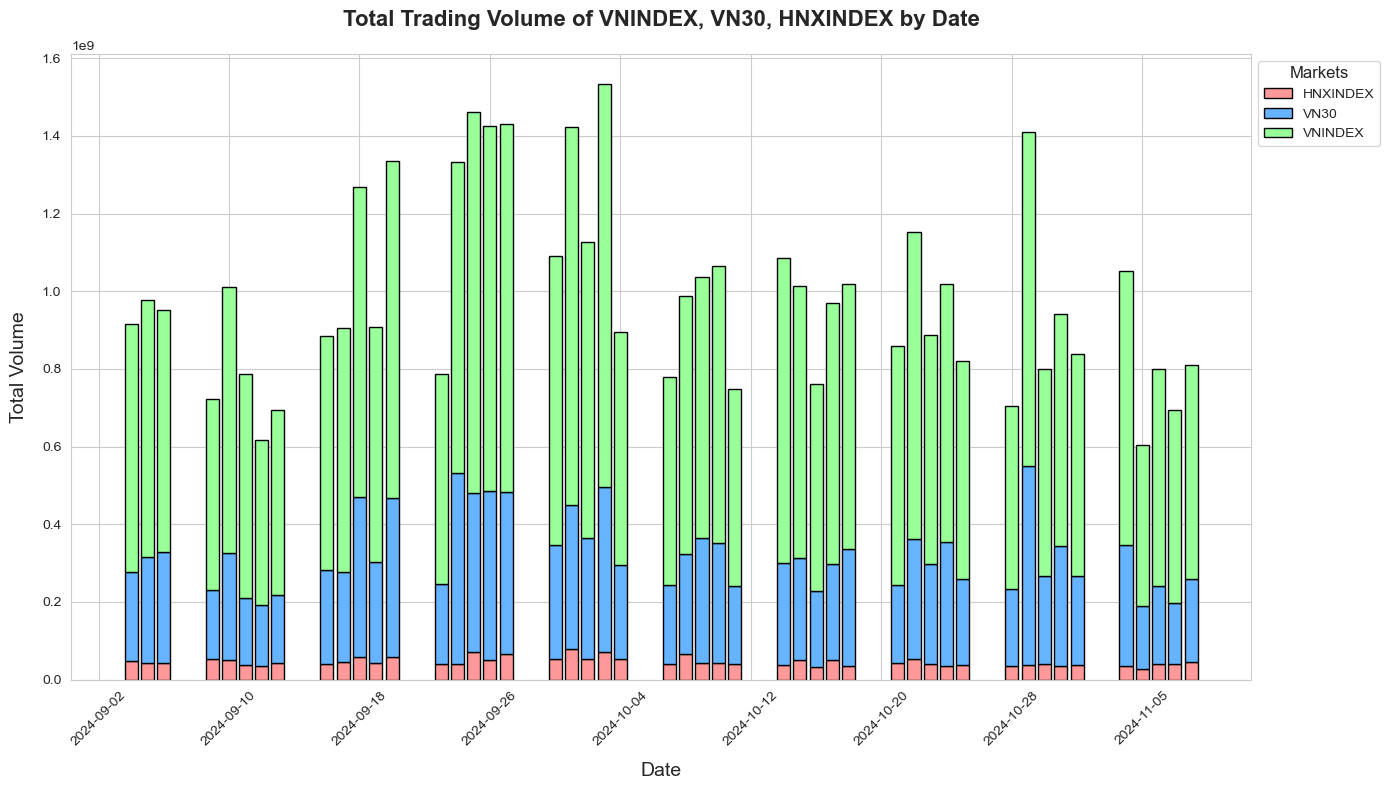

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thi·∫øt l·∫≠p b·∫£ng m√†u
sns.set_palette("pastel")
sns.set_style("whitegrid")

# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt ch·ªìng (stacked bar chart)
plt.figure(figsize=(14, 8))

# Bi·ªÉu ƒë·ªì ch·ªìng c·ªôt
plt.bar(
    total_volume_by_date_all['date'],
    total_volume_by_date_all['max_volume_hnxindex'],
    label='HNXINDEX',
    color='#ff9999',  # M√†u pastel ƒë·ªè nh·∫°t
    edgecolor='black',
)
plt.bar(
    total_volume_by_date_all['date'],
    total_volume_by_date_all['max_volume_vn30'],
    bottom=total_volume_by_date_all['max_volume_hnxindex'],
    label='VN30',
    color='#66b3ff',  # M√†u pastel xanh nh·∫°t
    edgecolor='black',
)
plt.bar(
    total_volume_by_date_all['date'],
    total_volume_by_date_all['max_volume_vnindex'],
    bottom=total_volume_by_date_all['max_volume_hnxindex'] + total_volume_by_date_all['max_volume_vn30'],
    label='VNINDEX',
    color='#99ff99',  # M√†u pastel xanh l√°
    edgecolor='black',
)

# Thi·∫øt l·∫≠p nh√£n v√† ti√™u ƒë·ªÅ
plt.title('Total Trading Volume of VNINDEX, VN30, HNXINDEX by Date', fontsize=16, weight='bold', pad=20)
plt.xlabel('Date', fontsize=14, labelpad=10)
plt.ylabel('Total Volume', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# TƒÉng s·ªë l∆∞·ª£ng nh√£n tr√™n tr·ª•c x (l·∫•y t·ªëi ƒëa 10 nh√£n)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

# Th√™m ch√∫ th√≠ch v√† tinh ch·ªânh v·ªã tr√≠
plt.legend(title="Markets", title_fontsize=12, fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# TƒÉng kho·∫£ng c√°ch gi·ªØa c√°c th√†nh ph·∫ßn
plt.tight_layout()

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()



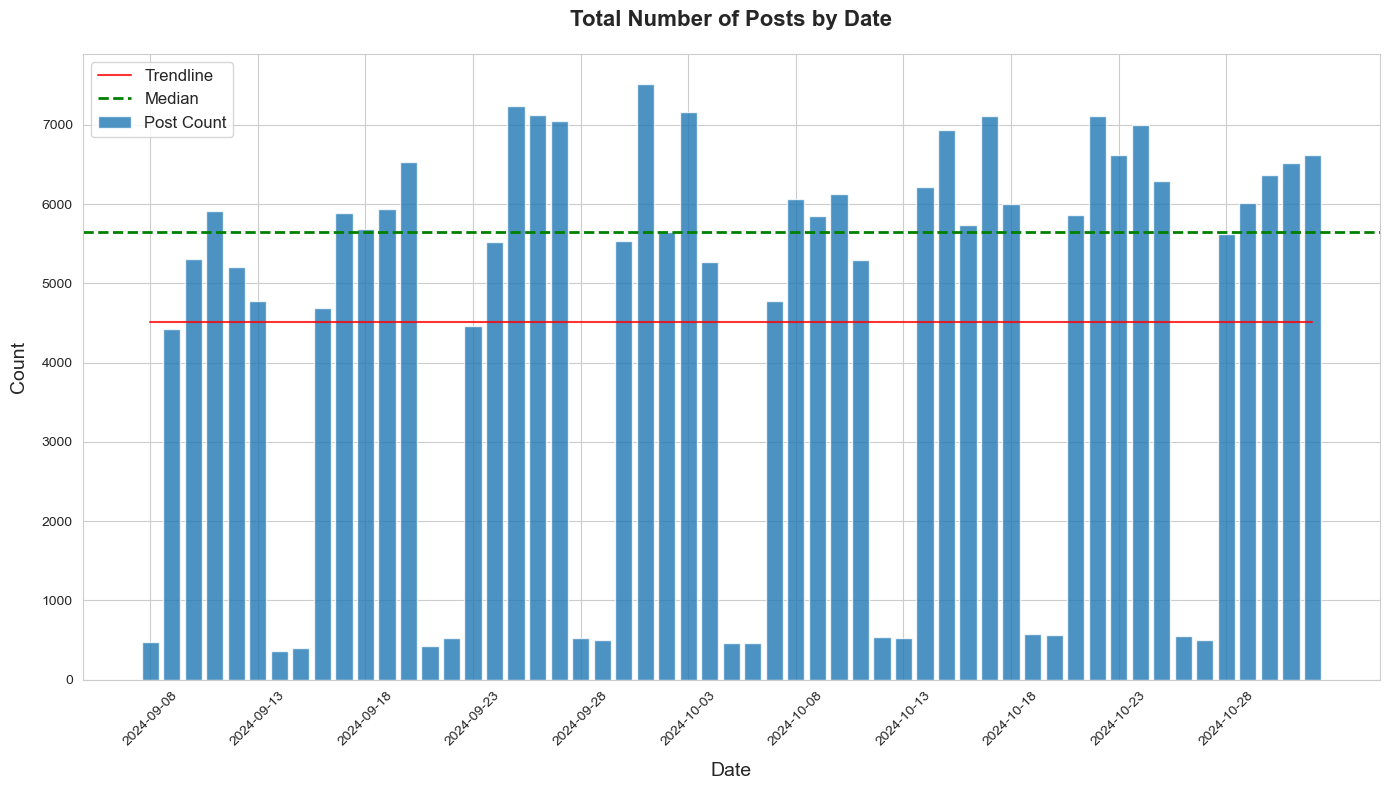

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline

# Chuy·ªÉn ƒë·ªïi c·ªôt 'date' sang ƒë·ªãnh d·∫°ng datetime n·∫øu ch∆∞a ƒë∆∞·ª£c chuy·ªÉn ƒë·ªïi
posts_df['date'] = pd.to_datetime(posts_df['date'], format='ISO8601')

# T·∫°o ra post_counts_by_date ƒë·ªÉ t√≠nh s·ªë b√†i vi·∫øt trong ng√†y
post_counts_by_date = posts_df.groupby(pd.Grouper(key='date', freq='D')).size().reset_index()
post_counts_by_date.columns = ['date', 'post_count']
post_counts_by_date['date'] = post_counts_by_date['date'].dt.strftime('%Y-%m-%d')

# Thi·∫øt l·∫≠p b·∫£ng m√†u v√† phong c√°ch
sns.set_palette("pastel")
sns.set_style("whitegrid")

# V·∫Ω bi·ªÉu ƒë·ªì d·∫°ng c·ªôt
plt.figure(figsize=(14, 8))
plt.bar(post_counts_by_date['date'], post_counts_by_date['post_count'], color='#1f77b4', alpha=0.8, label='Post Count')
plt.plot(post_counts_by_date['date'], [post_counts_by_date['post_count'].mean()] * len(post_counts_by_date['date']), color='red', alpha=0.8, label='Mean')

# Th√™m ƒë∆∞·ªùng bi·ªÉu di·ªÖn gi√° tr·ªã trung v·ªã
median_value = post_counts_by_date['post_count'].median()
plt.axhline(y=median_value, color='green', linestyle='--', linewidth=2, label='Median')

# Th√™m nh√£n v√† ch√∫ th√≠ch
plt.title('Total Number of Posts by Date', fontsize=16, weight='bold', pad=20)
plt.xlabel('Date', fontsize=14, labelpad=10)
plt.ylabel('Count', fontsize=14, labelpad=10)
plt.xticks(ticks=np.arange(0, len(post_counts_by_date['date']), max(1, len(post_counts_by_date['date']) // 10)), 
           labels=post_counts_by_date['date'][::max(1, len(post_counts_by_date['date']) // 10)], rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12, loc='upper left')

# TƒÉng kho·∫£ng c√°ch v√† hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.tight_layout()
plt.show()


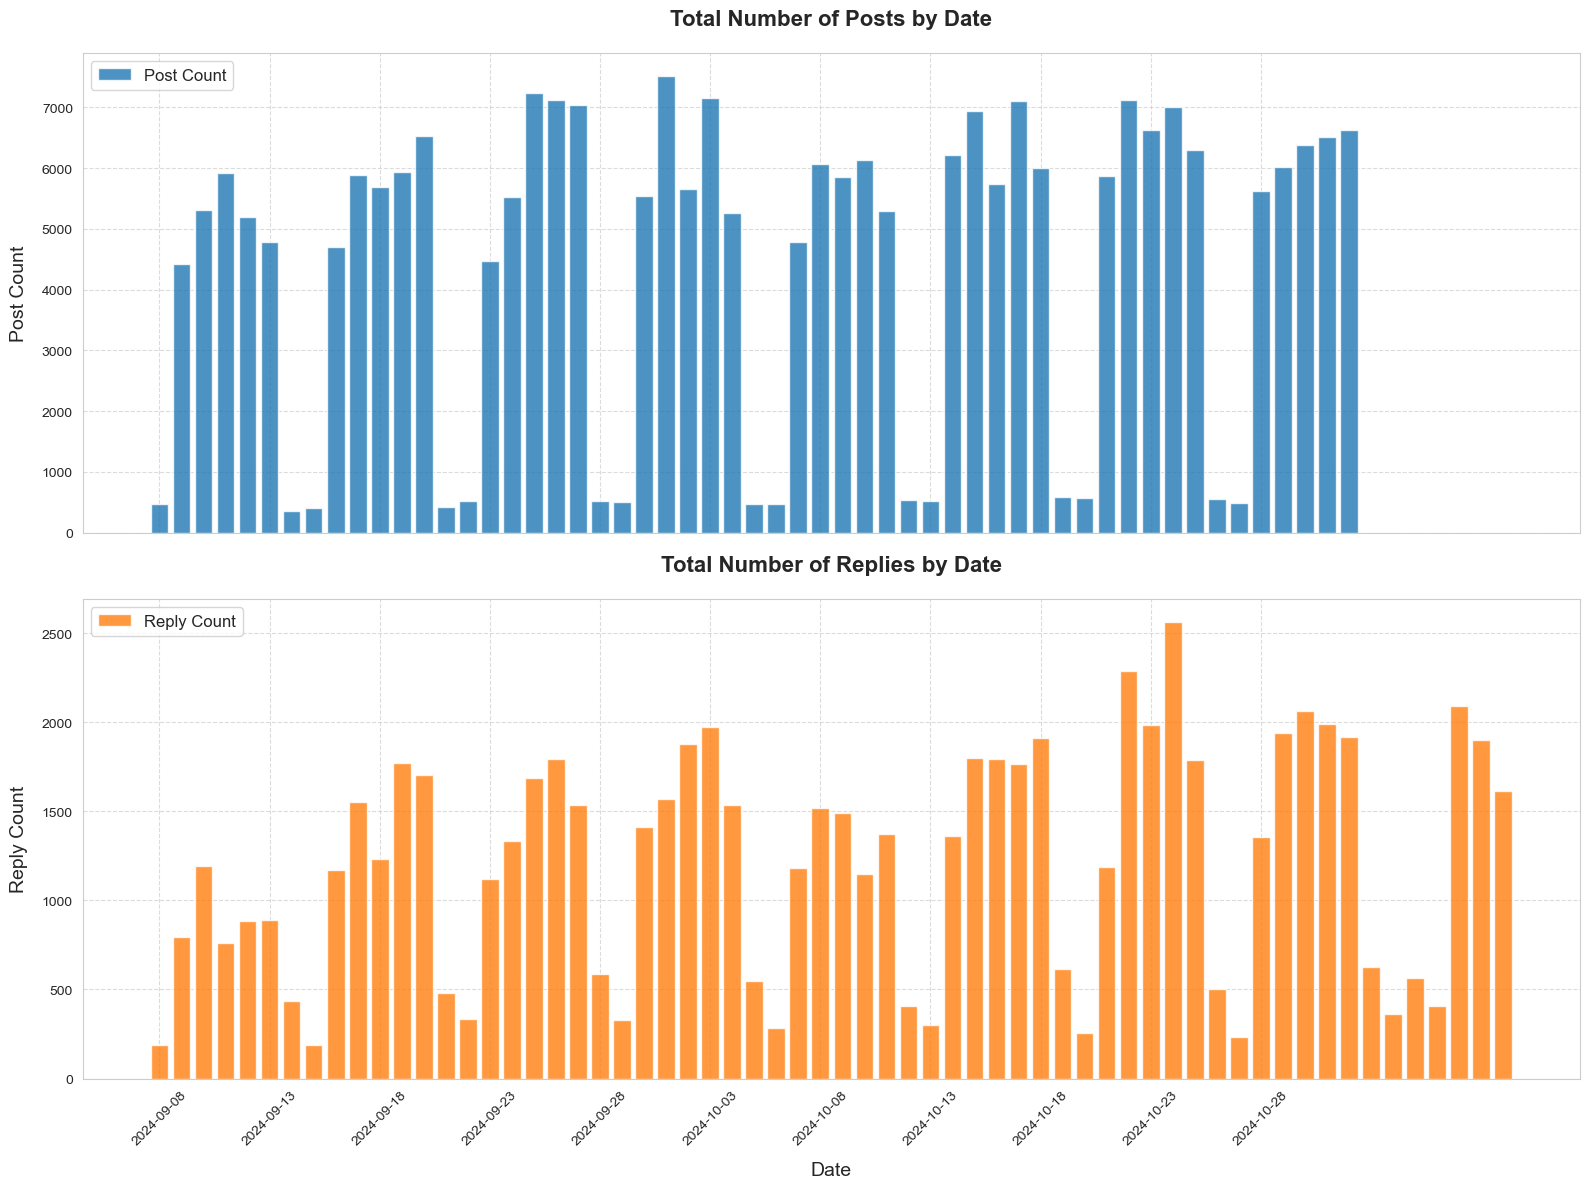

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chuy·ªÉn ƒë·ªïi c·ªôt 'date' sang ƒë·ªãnh d·∫°ng datetime n·∫øu ch∆∞a ƒë∆∞·ª£c chuy·ªÉn ƒë·ªïi
posts_df['date'] = pd.to_datetime(posts_df['date'], format='ISO8601')
replies_df['date'] = pd.to_datetime(replies_df['date'], format='ISO8601')

# T·∫°o dataframe s·ªë l∆∞·ª£ng b√†i vi·∫øt v√† ph·∫£n h·ªìi theo ng√†y
post_counts_by_date = posts_df.groupby(pd.Grouper(key='date', freq='D')).size().reset_index()
post_counts_by_date.columns = ['date', 'post_count']
post_counts_by_date['date'] = post_counts_by_date['date'].dt.strftime('%Y-%m-%d')

reply_counts_by_date = replies_df.groupby(pd.Grouper(key='date', freq='D')).size().reset_index()
reply_counts_by_date.columns = ['date', 'reply_count']
reply_counts_by_date['date'] = reply_counts_by_date['date'].dt.strftime('%Y-%m-%d')

# Thi·∫øt l·∫≠p b·∫£ng m√†u v√† phong c√°ch chung
sns.set_palette("pastel")
sns.set_style("whitegrid")

# T·∫°o figure cho dashboard
fig, axes = plt.subplots(2, 1, figsize=(16, 12), sharex=True)

# Bi·ªÉu ƒë·ªì 1: S·ªë b√†i vi·∫øt theo ng√†y
axes[0].bar(post_counts_by_date['date'], post_counts_by_date['post_count'], color='#1f77b4', alpha=0.8, label='Post Count')
axes[0].set_title('Total Number of Posts by Date', fontsize=16, weight='bold', pad=20)
axes[0].set_ylabel('Post Count', fontsize=14, labelpad=10)
axes[0].legend(fontsize=12, loc='upper left')
axes[0].grid(True, linestyle='--', alpha=0.7)

# Bi·ªÉu ƒë·ªì 2: S·ªë ph·∫£n h·ªìi theo ng√†y
axes[1].bar(reply_counts_by_date['date'], reply_counts_by_date['reply_count'], color='#ff7f0e', alpha=0.8, label='Reply Count')
axes[1].set_title('Total Number of Replies by Date', fontsize=16, weight='bold', pad=20)
axes[1].set_xlabel('Date', fontsize=14, labelpad=10)
axes[1].set_ylabel('Reply Count', fontsize=14, labelpad=10)
axes[1].legend(fontsize=12, loc='upper left')
axes[1].grid(True, linestyle='--', alpha=0.7)

# C√†i ƒë·∫∑t nh√£n tr·ª•c x
axes[1].set_xticks(ticks=np.arange(0, len(post_counts_by_date['date']), max(1, len(post_counts_by_date['date']) // 10)))
axes[1].set_xticklabels(post_counts_by_date['date'][::max(1, len(post_counts_by_date['date']) // 10)], rotation=45, fontsize=10)

# TƒÉng kho·∫£ng c√°ch gi·ªØa c√°c bi·ªÉu ƒë·ªì
plt.tight_layout()

# Hi·ªÉn th·ªã dashboard
plt.show()


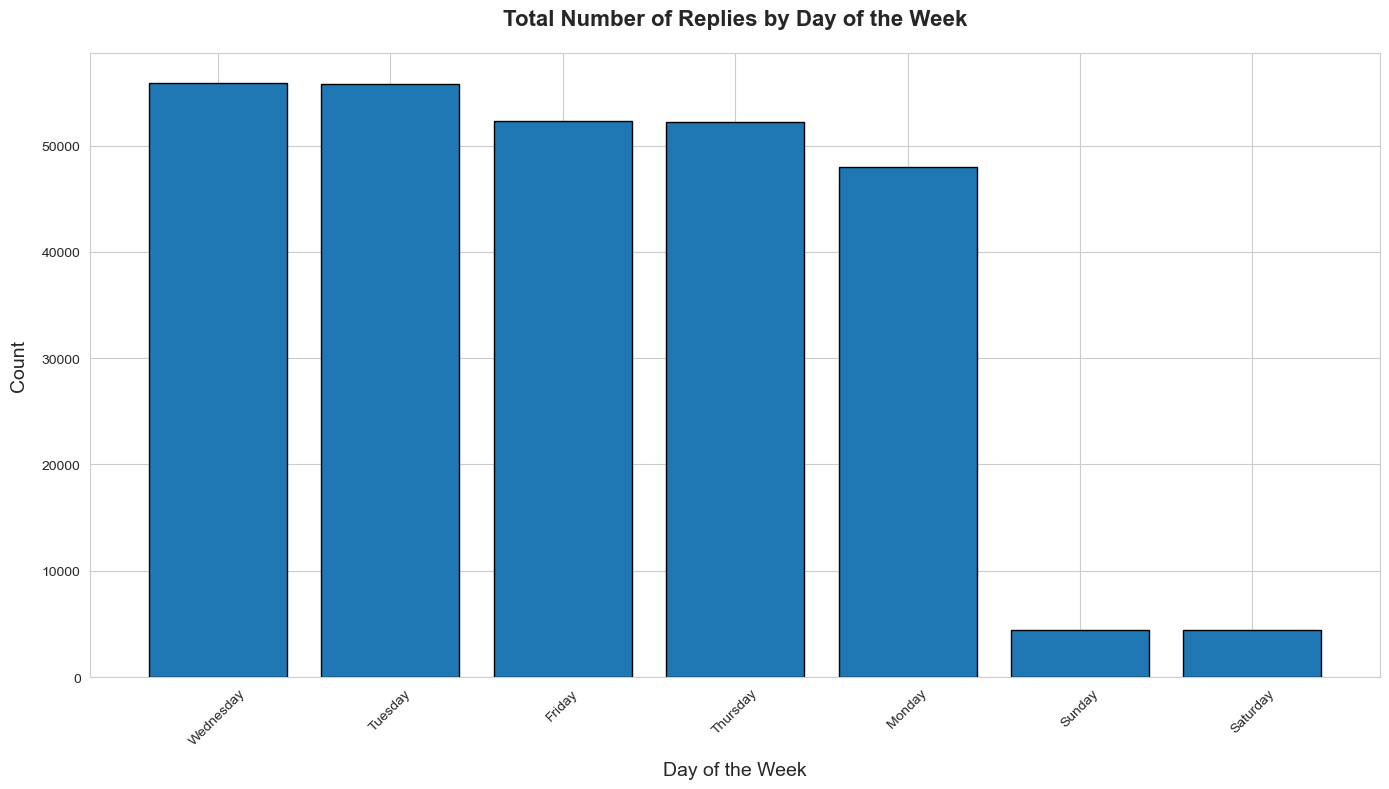

In [17]:
# T·∫°o column chart cho s·ªë l∆∞·ª£ng b√†i vi·∫øt theo th·ª© trong tu·∫ßn
posts_df['day_of_week'] = posts_df['date'].dt.day_name()
posts_df['day_of_week'] = pd.Categorical(posts_df['day_of_week'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
posts_by_day = posts_df['day_of_week'].value_counts().reset_index()
posts_by_day.columns = ['day_of_week', 'count']

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(14, 8))
plt.bar(posts_by_day['day_of_week'], posts_by_day['count'], color='#1f77b4', edgecolor='black')

# Th√™m nh√£n v√† ch√∫ th√≠ch
plt.title('Total Number of Replies by Day of the Week', fontsize=16, weight='bold', pad=20)
plt.xlabel('Day of the Week', fontsize=14, labelpad=10)
plt.ylabel('Count', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.tight_layout()
plt.show()


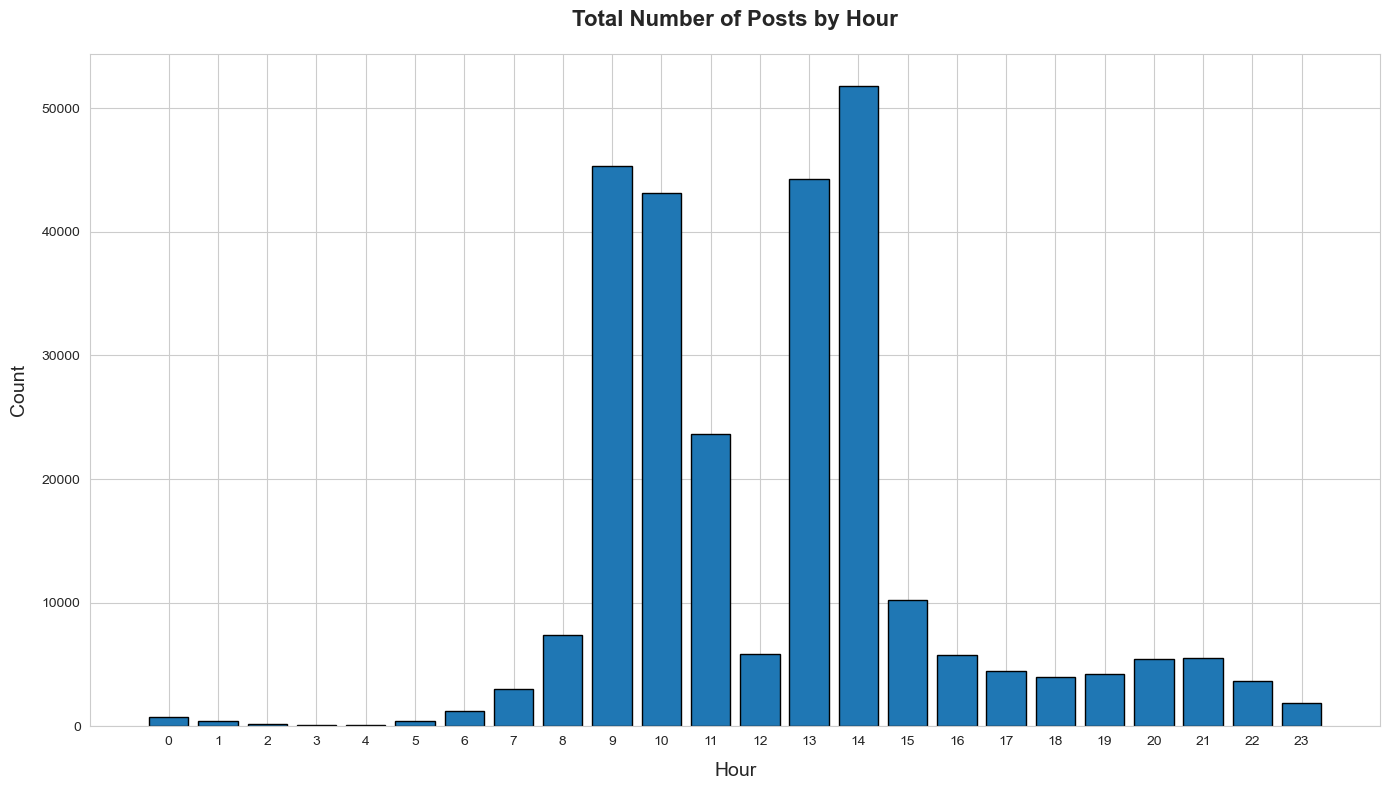

In [ ]:
# T·∫°o column chart cho s·ªë l∆∞·ª£ng b√†i vi·∫øt theo gi·ªù.
post_counts_by_hour = posts_df.groupby(posts_df['date'].dt.hour).size().reset_index()
post_counts_by_hour.columns = ['hour', 'post_count']

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(14, 8))
plt.bar(post_counts_by_hour['hour'], post_counts_by_hour['post_count'], color='#1f77b4', edgecolor='black')

# Th√™m nh√£n v√† ch√∫ th√≠ch
plt.title('Total Number of Posts by Hour', fontsize=16, weight='bold', pad=20)
plt.xlabel('Hour', fontsize=14, labelpad=10)
plt.ylabel('Count', fontsize=14, labelpad=10)
plt.xticks(post_counts_by_hour['hour'], fontsize=10)
plt.yticks(fontsize=10)

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.tight_layout()
plt.show()

## in ra trung b√¨nh s·ªë b√†i vi·∫øt theo gi·ªù
post_counts_by_hour['post_count'].mean()



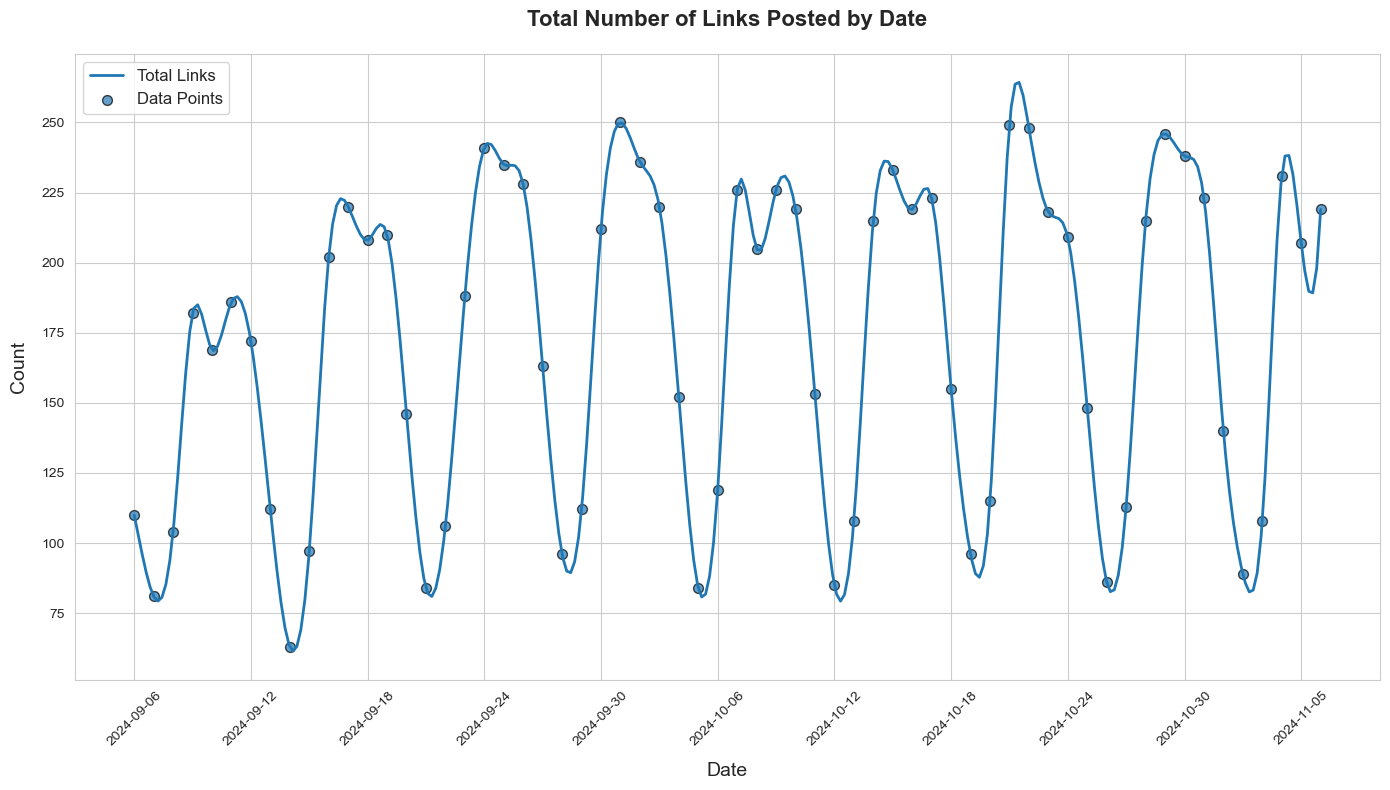

In [19]:
# t·∫°o ra link_type_counts_by_date
link_type_counts_by_date = links_df.groupby([pd.Grouper(key='date', freq='D')]).size().reset_index(name='count')
link_type_counts_by_date['date'] = link_type_counts_by_date['date'].dt.strftime('%Y-%m-%d')

from scipy.interpolate import make_interp_spline

# Thi·∫øt l·∫≠p b·∫£ng m√†u v√† phong c√°ch
sns.set_palette("pastel")
sns.set_style("whitegrid")

# N·ªôi suy ƒë·ªÉ ƒë∆∞·ªùng m∆∞·ª£t h∆°n
x = np.arange(len(link_type_counts_by_date['date']))
x_new = np.linspace(x.min(), x.max(), 300)
y_spline = make_interp_spline(x, link_type_counts_by_date['count'])(x_new)

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(14, 8))
plt.plot(x_new, y_spline, color='#1f77b4', linewidth=2, label='Total Links')
plt.scatter(x, link_type_counts_by_date['count'], color='#1f77b4', edgecolor='black', alpha=0.7, s=50, label='Data Points')

# Th√™m nh√£n v√† ch√∫ th√≠ch
plt.title('Total Number of Links Posted by Date', fontsize=16, weight='bold', pad=20)
plt.xlabel('Date', fontsize=14, labelpad=10)
plt.ylabel('Count', fontsize=14, labelpad=10)
plt.xticks(ticks=x[::len(x)//10], labels=link_type_counts_by_date['date'][::len(x)//10], rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12, loc='upper left')

# TƒÉng kho·∫£ng c√°ch v√† hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.tight_layout()
plt.show()



Nh·∫≠n th·∫•y c√≥ v·∫ª s·ªë l·∫ßn xu·∫•t hi·ªán link c√≥ t∆∞∆°ng quan r·∫•t l·ªõn v·ªõi l∆∞·ª£ng giao d·ªãch c·ªï phi·∫øu.

### Khi s·ªë l∆∞·ª£ng link ƒë∆∞·ª£c ƒë·ªÅ c·∫≠p tƒÉng (ƒë·∫∑c bi·ªát n·∫øu l√† c√°c tin t·ª©c quan tr·ªçng), kh·ªëi l∆∞·ª£ng giao d·ªãch c√≥ th·ªÉ tƒÉng do:

1. *Nh√† ƒë·∫ßu t∆∞ ch√∫ √Ω v√† ph·∫£n ·ª©ng v·ªõi th√¥ng tin.*

2. *S·ª± ki·ªán thu h√∫t d√≤ng v·ªën m·ªõi v√†o c·ªï phi·∫øu li√™n quan.*

### **Ng∆∞·ª£c l·∫°i**, n·∫øu m·ªôt c·ªï phi·∫øu √≠t ƒë∆∞·ª£c ch√∫ √Ω (s·ªë l∆∞·ª£ng link √≠t), kh·∫£ nƒÉng kh·ªëi l∆∞·ª£ng giao d·ªãch s·∫Ω th·∫•p do s·ª± quan t√¢m √≠t h∆°n.

### Gi·∫£ thuy·∫øt:
S·ªë l∆∞·ª£ng link ƒë∆∞·ª£c ƒë·ªÅ c·∫≠p c√≥ t∆∞∆°ng quan thu·∫≠n v·ªõi kh·ªëi l∆∞·ª£ng giao d·ªãch c·ªßa c·ªï phi·∫øu.

### C√°ch ch·ª©ng minh gi·∫£ thuy·∫øt:
1. **Thu th·∫≠p d·ªØ li·ªáu**: S·ª≠ d·ª•ng d·ªØ li·ªáu t·ª´ `links_df` ƒë·ªÉ l·∫•y s·ªë l∆∞·ª£ng link ƒë∆∞·ª£c ƒë·ªÅ c·∫≠p theo ng√†y v√† d·ªØ li·ªáu t·ª´ `total_volume_by_date_all` ƒë·ªÉ l·∫•y kh·ªëi l∆∞·ª£ng giao d·ªãch theo ng√†y.

2. **T√≠nh to√°n t∆∞∆°ng quan**: S·ª≠ d·ª•ng h·ªá s·ªë t∆∞∆°ng quan Pearson ƒë·ªÉ ƒëo l∆∞·ªùng m·ª©c ƒë·ªô t∆∞∆°ng quan gi·ªØa s·ªë l∆∞·ª£ng link v√† kh·ªëi l∆∞·ª£ng giao d·ªãch.

3. **Tr·ª±c quan h√≥a d·ªØ li·ªáu**: V·∫Ω bi·ªÉu ƒë·ªì ƒë∆∞·ªùng (line chart) ƒë·ªÉ so s√°nh xu h∆∞·ªõng c·ªßa s·ªë l∆∞·ª£ng link v√† kh·ªëi l∆∞·ª£ng giao d·ªãch theo th·ªùi gian.

4. **Ph√¢n t√≠ch k·∫øt qu·∫£**: ƒê√°nh gi√° h·ªá s·ªë t∆∞∆°ng quan v√† bi·ªÉu ƒë·ªì ƒë·ªÉ x√°c ƒë·ªãnh xem c√≥ m·ªëi quan h·ªá r√µ r√†ng gi·ªØa s·ªë l∆∞·ª£ng link v√† kh·ªëi l∆∞·ª£ng giao d·ªãch hay kh√¥ng.

### M√£ Python ƒë·ªÉ ch·ª©ng minh gi·∫£ thuy·∫øt:

In [20]:

# Chuy·ªÉn ƒë·ªïi c·ªôt 'date' th√†nh ƒë·ªãnh d·∫°ng datetime n·∫øu ch∆∞a ƒë∆∞·ª£c chuy·ªÉn ƒë·ªïi
total_link_counts_by_date['date'] = pd.to_datetime(total_link_counts_by_date['date'])
total_volume_by_date_all['date'] = pd.to_datetime(total_volume_by_date_all['date'])

# H·ª£p nh·∫•t hai DataFrame d·ª±a tr√™n c·ªôt 'date'
merged_df = pd.merge(total_link_counts_by_date, total_volume_by_date_all, on='date')
# T√≠nh to√°n h·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa 'count' v√† 'max_volume_vnindex'
correlation_vnindex, _ = pearsonr(merged_df['count'], merged_df['max_volume_vnindex'])
print('h·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa count v√† max_volume_vnindex :', correlation_vnindex)

# T√≠nh to√°n h·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa 'count' v√† 'max_volume_vn30'
correlation_vn30, _ = pearsonr(merged_df['count'], merged_df['max_volume_vn30'])
print('h·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa count v√† max_volume_vn30 :', correlation_vn30)

# T√≠nh to√°n h·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa 'count' v√† 'max_volume_hnxindex'
correlation_hnxindex, _ = pearsonr(merged_df['count'], merged_df['max_volume_hnxindex'])
print('h·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa count v√† max_volume_hnxindex :', correlation_hnxindex)

# T√≠nh to√°n h·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa 'count' v√† t·ªïng kh·ªëi l∆∞·ª£ng giao d·ªãch c·ªßa c·∫£ 3 m√£
merged_df['total_volume'] = merged_df['max_volume_vnindex'] + merged_df['max_volume_vn30'] + merged_df['max_volume_hnxindex']
correlation_total_volume, _ = pearsonr(merged_df['count'], merged_df['total_volume'])
print('H·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa count v√† t·ªïng kh·ªëi l∆∞·ª£ng giao d·ªãch c·ªßa c·∫£ 3 m√£:', correlation_total_volume)


h·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa count v√† max_volume_vnindex : 0.3257006135139205
h·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa count v√† max_volume_vn30 : 0.28806849536558565
h·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa count v√† max_volume_hnxindex : 0.12516051080864538
H·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa count v√† t·ªïng kh·ªëi l∆∞·ª£ng giao d·ªãch c·ªßa c·∫£ 3 m√£: 0.31707887701441095


ko ·ªïn :)))))

In [21]:
# Chuy·ªÉn ƒë·ªïi c·ªôt 'date' th√†nh ƒë·ªãnh d·∫°ng datetime n·∫øu ch∆∞a ƒë∆∞·ª£c chuy·ªÉn ƒë·ªïi
post_counts_by_date['date'] = pd.to_datetime(post_counts_by_date['date'])
total_volume_by_date_all['date'] = pd.to_datetime(total_volume_by_date_all['date'])

# H·ª£p nh·∫•t hai DataFrame d·ª±a tr√™n c·ªôt 'date'
merged_post_volume_df = pd.merge(post_counts_by_date, total_volume_by_date_all, on='date')
# T√≠nh to√°n h·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa 'count' v√† 'max_volume_vnindex'
correlation_vnindex, _ = pearsonr(merged_post_volume_df['post_count'], merged_post_volume_df['max_volume_vnindex'])
print('h·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa count v√† max_volume_vnindex :', correlation_vnindex)

# T√≠nh to√°n h·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa 'count' v√† 'max_volume_vn30'
correlation_vn30, _ = pearsonr(merged_post_volume_df['post_count'], merged_post_volume_df['max_volume_vn30'])
print('h·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa count v√† max_volume_vn30 :', correlation_vn30)

# T√≠nh to√°n h·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa 'count' v√† 'max_volume_hnxindex'
correlation_hnxindex, _ = pearsonr(merged_post_volume_df['post_count'], merged_post_volume_df['max_volume_hnxindex'])
print('h·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa count v√† max_volume_hnxindex :', correlation_hnxindex)

# T√≠nh to√°n h·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa 'count' v√† t·ªïng kh·ªëi l∆∞·ª£ng giao d·ªãch c·ªßa c·∫£ 3 m√£
merged_post_volume_df['total_volume'] = merged_post_volume_df['max_volume_vnindex'] + merged_post_volume_df['max_volume_vn30'] + merged_post_volume_df['max_volume_hnxindex']
correlation_total_volume, _ = pearsonr(merged_post_volume_df['post_count'], merged_post_volume_df['total_volume'])
print('H·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa count v√† t·ªïng kh·ªëi l∆∞·ª£ng giao d·ªãch c·ªßa c·∫£ 3 m√£:', correlation_total_volume)

h·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa count v√† max_volume_vnindex : 0.6057876267247609
h·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa count v√† max_volume_vn30 : 0.44704638309020067
h·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa count v√† max_volume_hnxindex : 0.3942607881766281
H·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa count v√† t·ªïng kh·ªëi l∆∞·ª£ng giao d·ªãch c·ªßa c·∫£ 3 m√£: 0.5644390093656052


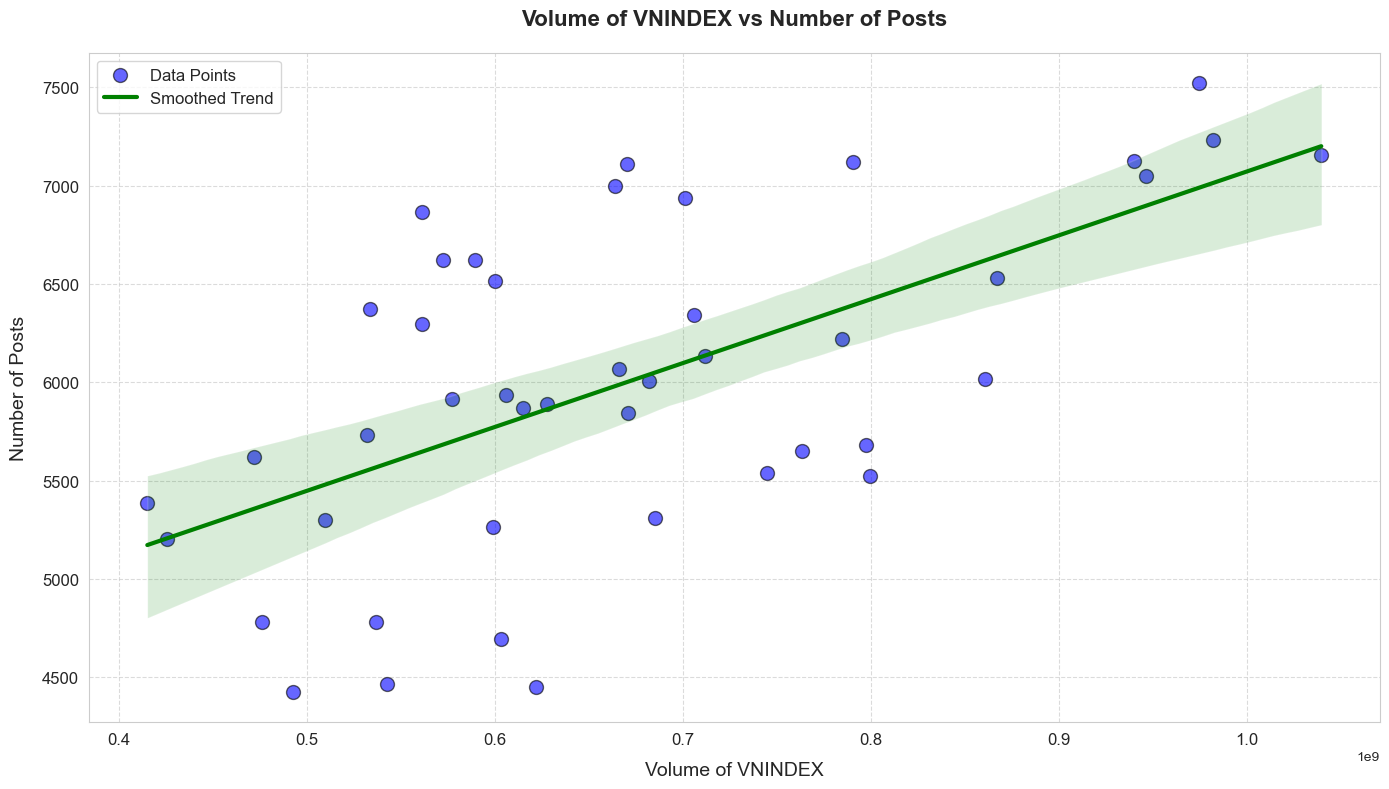

In [22]:
from scipy.stats import linregress

# T·∫°o scatter plot v·ªõi ƒë∆∞·ªùng xu h∆∞·ªõng m·ªãn
plt.figure(figsize=(14, 8))

# Scatter plot
plt.scatter(merged_post_volume_df['max_volume_vnindex'], merged_post_volume_df['post_count'], 
            color='b', alpha=0.6, edgecolor='k', s=100, label='Data Points')

# V·∫Ω ƒë∆∞·ªùng xu h∆∞·ªõng m·ªãn s·ª≠ d·ª•ng Seaborn
sns.regplot(x='max_volume_vnindex', y='post_count', data=merged_post_volume_df, 
            scatter=False, color='g', 
            line_kws={'linewidth': 3}, label='Smoothed Trend')

# T√πy ch·ªânh th√¥ng tin bi·ªÉu ƒë·ªì
plt.title('Volume of VNINDEX vs Number of Posts', fontsize=16, weight='bold', pad=20)
plt.xlabel('Volume of VNINDEX', fontsize=14, labelpad=10)
plt.ylabel('Number of Posts', fontsize=14, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

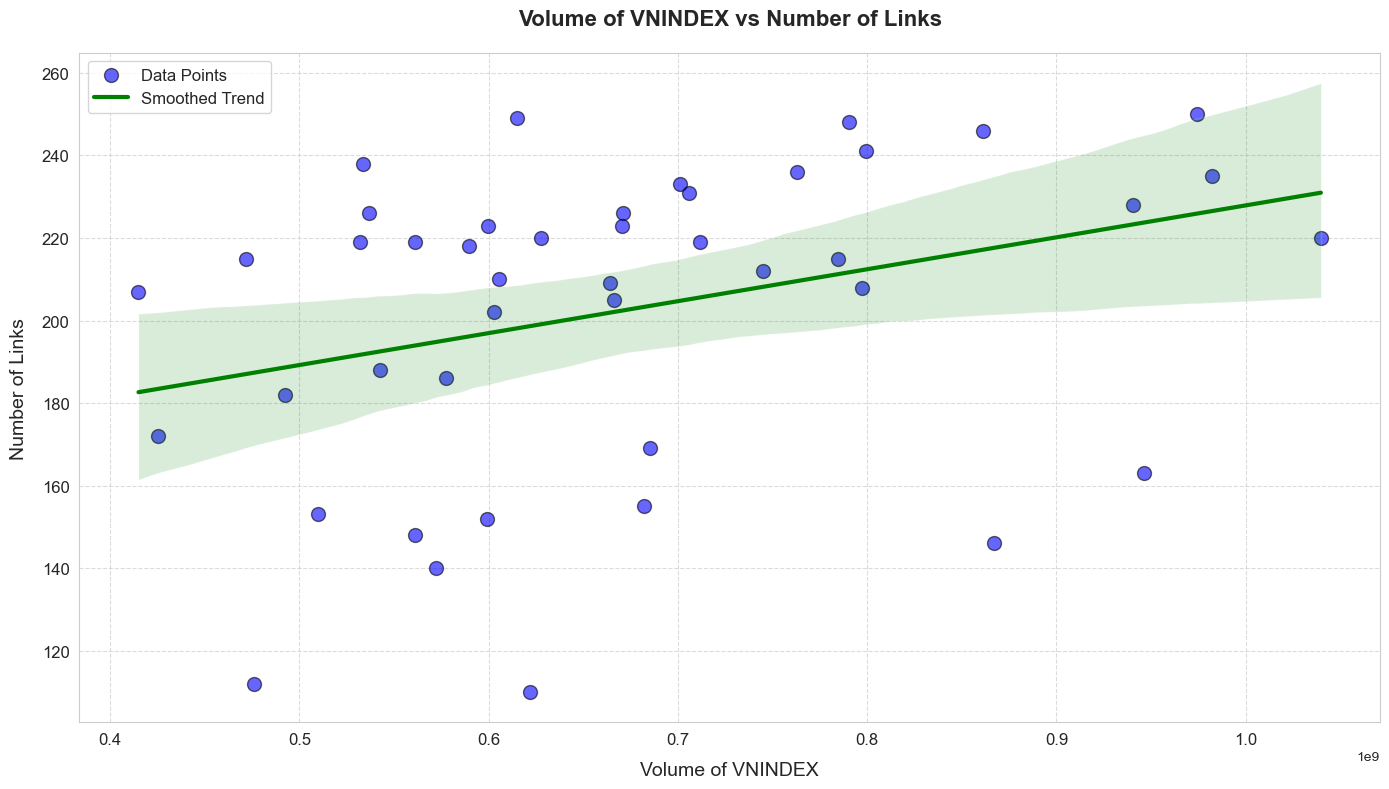

In [23]:
from scipy.stats import linregress

# T·∫°o scatter plot v·ªõi ƒë∆∞·ªùng xu h∆∞·ªõng m·ªãn
plt.figure(figsize=(14, 8))

# Scatter plot
plt.scatter(merged_df['max_volume_vnindex'], merged_df['count'], 
            color='b', alpha=0.6, edgecolor='k', s=100, label='Data Points')

# V·∫Ω ƒë∆∞·ªùng xu h∆∞·ªõng m·ªãn s·ª≠ d·ª•ng Seaborn
sns.regplot(x='max_volume_vnindex', y='count', data=merged_df, 
            scatter=False, color='g', 
            line_kws={'linewidth': 3}, label='Smoothed Trend')

# T√πy ch·ªânh th√¥ng tin bi·ªÉu ƒë·ªì
plt.title('Volume of VNINDEX vs Number of Links', fontsize=16, weight='bold', pad=20)
plt.xlabel('Volume of VNINDEX', fontsize=14, labelpad=10)
plt.ylabel('Number of Links', fontsize=14, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()


#### 3. Ph√¢n t√≠ch m·ªói t∆∞∆°ng quan c·ªßa s·ª± t∆∞∆°ng t√°c tr√™n b√†i vi·∫øt v√† c√°c y·∫øu t·ªë kh√°c.

In [24]:
# T·∫°o m·ªôt dataframe m·ªõi ch·ª©a c√°c b√†i vi·∫øt, ƒë·ªô d√†i b√†i vi·∫øt, t·ªïng l∆∞·ª£t like, t·ªïng l∆∞·ª£t ph·∫£n h·ªìi, sentiment, c√°c m√£ ch·ª©ng kho√°n ƒë·ªÅ c·∫≠p
posts_summary = posts_df.loc[:, ['date', 'postID', 'originalContent', 'sentiment', 'taggedSymbols']]
posts_summary['post_length'] = posts_summary['originalContent'].apply(lambda x: len(x))
posts_summary['total_likes'] = posts_df['totalLikes']
posts_summary['total_replies'] = posts_df['totalReplies']

# SƒÉp x·∫øp dataframe theo s·ªë l∆∞·ª£ng l∆∞·ª£t like gi·∫£m d·∫ßn
posts_summary = posts_summary.sort_values(by='total_likes', ascending=False).reset_index(drop=True)
posts_summary.head(20)

# Nh·∫≠n th·∫•y c√°c b√†i vi·∫øt t·ªïng h·ª£p c·ªßa ng√†y l√† nh·ªØng b√†i c√≥ l∆∞·ª£ng t∆∞∆°ng t√°c cao, v√† l∆∞·ª£t b√¨nh lu·∫≠n cao.

date    postID  \
0  2024-10-24 15:19:54.307000+07:00  28869167   
1  2024-09-26 20:35:36.153000+07:00  28352578   
2  2024-10-28 15:21:13.823000+07:00  28923357   
3  2024-10-22 19:47:48.227000+07:00  28821151   
4  2024-10-03 15:27:47.050000+07:00  28483887   
5  2024-10-22 15:19:18.600000+07:00  28817167   
6  2024-09-17 15:26:44.700000+07:00  28172493   
7  2024-10-15 15:21:31.533000+07:00  28687978   
8  2024-10-02 15:31:17.630000+07:00  28457094   
9  2024-11-04 15:39:53.723000+07:00  29054941   
10 2024-10-16 15:18:03.357000+07:00  28711937   
11 2024-10-30 15:20:50.837000+07:00  28971908   
12 2024-10-25 15:42:57.367000+07:00  28895122   
13 2024-11-06 15:27:39.133000+07:00  29099549   
14 2024-10-31 15:19:19.040000+07:00  28999221   
15 2024-10-09 15:24:16.357000+07:00  28583498   
16 2024-09-13 15:23:10.810000+07:00  28125535   
17 2024-10-01 15:23:28.690000+07:00  28433192   
18 2024-10-04 15:30:46.103000+07:00  28507432   
19 2024-10-29 15:25:38.260000+07:00  28946981   

                                      originalContent sentiment  \
0   Ph√°i Sinh ng√†y 24/10/2024\n.\n- Hnay T√¢y Short...   neutral   
1   XU H∆Ø·ªöNG TTCK QU√ù 4. 2024\n\nƒê·ªÉ x√°c ƒë·ªãnh xu h∆∞...   neutral   
2   Ph√°i Sinh ng√†y 28/10/2024\n.\n- Hnay T√¢y Short...   neutral   
3   Hy v·ªçng nƒÉm sau t√¥i v√† c√°c b·∫°n s·∫Ω c√πng nhau c·ªï...   neutral   
4   Ph√°i Sinh ng√†y 3/10/2024\n.\n- Hnay T√¢y Short ...   neutral   
5   Ph√°i Sinh ng√†y 22/10/2024\n.\n- Hnay T√¢y Short...   neutral   
6   Ph√°i Sinh ng√†y 17/9/2024\n.\n- Hnay T√¢y Short ...   neutral   
7   Ph√°i Sinh ng√†y 15/10/2024\n.\n- Hnay T√¢y Short...   neutral   
8   Ph√°i Sinh ng√†y 2/10/2024\n.\n- Hnay T√¢y Long r...   neutral   
9   Ph√°i Sinh ng√†y 4/11/2024\n.\n- Hnay T√¢y Short ...   neutral   
10  Ph√°i Sinh ng√†y 16/10/2024\n.\n- Hnay T√¢y Short...   neutral   
11  Ph√°i Sinh ng√†y 30/10/2024\n.\n- Hnay T√¢y Short...   neutral   
12  Ph√°i Sinh ng√†y 25/10/2024\n.\n- Hnay T√¢y Long ...   neutral   
13  Ph√°i Sinh ng√†y 6/11/2024\n.\n- Hnay T√¢y Long r...   neutral   
14  Ph√°i Sinh ng√†y 31/10/2024\n.\n- Hnay T√¢y Long ...   neutral   
15  Ph√°i Sinh ng√†y 9/10/2024\n.\n- Hnay T√¢y Long r...   neutral   
16  Ph√°i Sinh ng√†y 13/9/2024\n.\n- Hnay T√¢y Long r...   neutral   
17  Ph√°i Sinh ng√†y 1/10/2024\n.\n- Hnay T√¢y Long r...   neutral   
18  Ph√°i Sinh ng√†y 4/10/2024\n.\n- Hnay T√¢y Short ...   neutral   
19  Ph√°i Sinh ng√†y 29/10/2024\n.\n- Hnay T√¢y Short...   neutral   

                                        taggedSymbols  post_length  \
0   [{"symb": "^DJI", "price": 42514.95}, {"symb":...          836   
1   [{"symb": "^DJI", "price": 42166.66}, {"symb":...         5785   
2   [{"symb": "^DJI", "price": 42114.4}, {"symb": ...          839   
3   [{"symb": "BSR", "price": 21.3}, {"symb": "DXG...         5372   
4   [{"symb": "$BTC", "price": 61459.01}, {"symb":...          774   
5   [{"symb": "^DJI", "price": 42931.6}, {"symb": ...          836   
6   [{"symb": "^DJI", "price": 41622.08}, {"symb":...          926   
7   [{"symb": "^DJI", "price": 43065.22}, {"symb":...         1195   
8   [{"symb": "$BTC", "price": 61728.04}, {"symb":...          784   
9   [{"symb": "^DJI", "price": 42052.19}, {"symb":...          837   
10  [{"symb": "^DJI", "price": 42740.42}, {"symb":...          974   
11  [{"symb": "^DJI", "price": 42233.05}, {"symb":...          837   
12  [{"symb": "^DJI", "price": 42114.4}, {"symb": ...          834   
13  [{"symb": "^DJI", "price": 42221.88}, {"symb":...          841   
14  [{"symb": "^DJI", "price": 42141.54}, {"symb":...          837   
15  [{"symb": "$BTC", "price": 62160.01}, {"symb":...          774   
16  [{"symb": "^DJI", "price": 41096.77}, {"symb":...          813   
17  [{"symb": "$BTC", "price": 63929.64}, {"symb":...          782   
18  [{"symb": "$BTC", "price": 61599.99}, {"symb":...          774   
19  [{"symb": "^DJI", "price": 42387.57}, {"symb":...          835   

    total_likes  total_replies  
0         

Nh·∫≠n x√©t:
- C√≥ v·∫ª ƒë·ªô d√†i b√†i vi·∫øt kh√¥ng ·∫£nh h∆∞·ªüng j ƒë·∫øn l∆∞·ª£ng t∆∞∆°ng t√°c nh∆∞ng t·ª´ `700-900` l√† 1 b√†i vi·∫øt c√≥ kh·∫£ nƒÉng ƒë·∫°t t∆∞∆°ng t√°c cao.

c√≥ v·∫ª b√†i vi·∫øt v·ªÅ c√°c m√£ ch·ª©ng kho√°n n∆∞·ªõc ngo√†i r·∫•t thu h√∫t l∆∞·ª£t t∆∞∆°ng t√°c

In [25]:
# Tr√≠ch xu·∫•t t·ª´ng m√£ ch·ª©ng kho√°n t·ª´ taggedSymbols c·ªßa 100 b√†i vi·∫øt c√≥ l∆∞·ª£t t∆∞∆°ng t√°c cao nh·∫•t v√† s·ªë l·∫ßn m√£ xu·∫•t hi·ªán trong 100 b√†i vi·∫øt ƒë√≥ t·∫°o th√†nh 1 dataframe m·ªõi
top_100_posts = posts_summary.head(100).copy()

# Tr√≠ch xu·∫•t c√°c m√£ ch·ª©ng kho√°n t·ª´ c·ªôt 'taggedSymbols'
top_100_posts['taggedSymbols'] = top_100_posts['taggedSymbols'].apply(lambda x: [d['symb'] for d in json.loads(x)] if x else [])

# T√°ch c√°c m√£ ch·ª©ng kho√°n th√†nh c√°c h√†ng ri√™ng l·∫ª
top_100_posts = top_100_posts.explode('taggedSymbols')

# Lo·∫°i b·ªè c√°c kho·∫£ng tr·∫Øng v√† chuy·ªÉn th√†nh ch·ªØ hoa
top_100_posts['taggedSymbols'] = top_100_posts['taggedSymbols'].str.strip().str.upper()

# Lo·∫°i b·ªè c√°c gi√° tr·ªã r·ªóng
top_100_posts = top_100_posts[top_100_posts['taggedSymbols'] != '']

# ƒê·∫øm s·ªë l·∫ßn xu·∫•t hi·ªán c·ªßa t·ª´ng m√£ ch·ª©ng kho√°n
top_100_stock_counts = top_100_posts['taggedSymbols'].value_counts().reset_index()
top_100_stock_counts.columns = ['symbol', 'count']

# T√≠nh t·ªïng s·ªë l∆∞·ª£t t∆∞∆°ng t√°c c·ªßa c√°c b√†i vi·∫øt ch·ª©a m√£ ch·ª©ng kho√°n ƒë√≥
interaction_counts = top_100_posts.groupby('taggedSymbols')[['total_likes', 'total_replies']].sum().reset_index()
interaction_counts['total_interactions'] = interaction_counts['total_likes'] + interaction_counts['total_replies']

# K·∫øt h·ª£p d·ªØ li·ªáu ƒë·∫øm v√† t∆∞∆°ng t√°c
top_100_stock_counts = top_100_stock_counts.merge(interaction_counts, left_on='symbol', right_on='taggedSymbols').drop(columns=['taggedSymbols'])

# S·∫Øp x·∫øp l·∫°i theo t·ªïng t∆∞∆°ng t√°c gi·∫£m d·∫ßn
top_100_stock_counts = top_100_stock_counts.sort_values(by='total_interactions', ascending=False)
top_100_stock_counts.head(10)

symbol  count  total_likes  total_replies  total_interactions
0  VNINDEX     97         4132           4516                8648
1     ^DJI     84         3662           4294                7956
2  VN30F1M     82         3538           4224                7762
3     VN30     80         3477           4179                7656
4    ^N225     77         3366           4152                7518
5     ^HSI     46         2024           2448                4472
6      VPB     43         1853           2115                3968
8      TPB     31         1370           1716                3086
9     $BTC     30         1322           1661                2983
7      HPG     34         1405           1371                2776

In [26]:
# Tr√≠ch xu·∫•t t·ª´ng m√£ ch·ª©ng kho√°n t·ª´ taggedSymbols c·ªßa 100 b√†i vi·∫øt c√≥ l∆∞·ª£t t∆∞∆°ng t√°c cao nh·∫•t v√† s·ªë l·∫ßn m√£ xu·∫•t hi·ªán trong 100 b√†i vi·∫øt ƒë√≥ t·∫°o th√†nh 1 dataframe m·ªõi
all_posts_summary = posts_summary.copy()
# Tr√≠ch xu·∫•t t·ª´ng m√£ ch·ª©ng kho√°n t·ª´ taggedSymbols c·ªßa t·∫•t c·∫£ c√°c b√†i vi·∫øt v√† s·ªë l·∫ßn m√£ xu·∫•t hi·ªán trong c√°c b√†i vi·∫øt ƒë√≥ t·∫°o th√†nh 1 dataframe m·ªõi
all_posts_summary['taggedSymbols'] = all_posts_summary['taggedSymbols'].apply(lambda x: [d['symb'] for d in json.loads(x)] if x else [])

# T√°ch c√°c m√£ ch·ª©ng kho√°n th√†nh c√°c h√†ng ri√™ng l·∫ª
all_posts_summary = all_posts_summary.explode('taggedSymbols')

# Lo·∫°i b·ªè c√°c kho·∫£ng tr·∫Øng v√† chuy·ªÉn th√†nh ch·ªØ hoa
all_posts_summary['taggedSymbols'] = all_posts_summary['taggedSymbols'].str.strip().str.upper()

# ƒê·∫øm s·ªë l·∫ßn xu·∫•t hi·ªán c·ªßa t·ª´ng m√£ ch·ª©ng kho√°n
all_stock_counts = all_posts_summary['taggedSymbols'].value_counts().reset_index()
all_stock_counts.columns = ['symbol', 'count']

# T√≠nh t·ªïng s·ªë l∆∞·ª£t t∆∞∆°ng t√°c c·ªßa c√°c b√†i vi·∫øt ch·ª©a m√£ ch·ª©ng kho√°n ƒë√≥
interaction_counts = all_posts_summary.groupby('taggedSymbols')[['total_likes', 'total_replies']].sum().reset_index()
interaction_counts['total_interactions'] = interaction_counts['total_likes'] + interaction_counts['total_replies']

# K·∫øt h·ª£p d·ªØ li·ªáu ƒë·∫øm v√† t∆∞∆°ng t√°c
all_stock_counts = all_stock_counts.merge(interaction_counts, left_on='symbol', right_on='taggedSymbols').drop(columns=['taggedSymbols'])

# S·∫Øp x·∫øp l·∫°i theo t·ªïng t∆∞∆°ng t√°c gi·∫£m d·∫ßn
all_stock_counts = all_stock_counts.sort_values(by='total_interactions', ascending=False)
all_stock_counts.head(10)



symbol  count  total_likes  total_replies  total_interactions
0   VNINDEX  55258        91548         104351              195899
1       HPG  13317        30303          35033               65336
2       VHM  12117        25148          30412               55560
4       DXG  10721        21492          26113               47605
3   VN30F1M  11448        21654          24819               46473
5       DIG  10390        19820          26092               45912
10     VN30   7537        19717          23127               42844
7       PDR   8325        17736          23053               40789
9       SSI   7911        18125          22165               40290
8       TPB   7951        16670          22698               39368

### Nh√¨n chung th√¨ trong 100 b√†i c√≥ l∆∞·ª£ng t∆∞∆°ng t√°c cao nh·∫•t th√¨ l∆∞·ª£ng t∆∞∆°ng t√°c c√≥ ph·ª• thu·ªôc v√†o VNINDEX, VN30, sau ƒë√≥ l√† c√°c m√£ c·ªßa n∆∞·ªõc ngo√†i nh∆∞ ^DIJ, ^N225. Nh∆∞ng khi x√©t t·ªïng th·ªÉ th√¨ ƒëa ph·∫ßn l√† c√°c m√£ c·ªßa th·ªã tr∆∞·ªùng ch·ª©ng kho√°n Vi·ªát Nam. Nh∆∞ v·∫≠y ta c√≥ th·ªÉ d·ª± ƒëo√°n nh∆∞ sau:
    
1. M√£ th·ªã tr∆∞·ªùng n∆∞·ªõc ngo√†i c√≥ s·ª± ·∫£nh h∆∞·ªüng s√¢u s·∫Øc ƒë·∫øn th·ªã tr∆∞·ªùng Vi·ªát Nam, v√¨ nh∆∞ng b√†i b√°o, th·ªëng k√™ c√≥ l∆∞·ª£ng t∆∞∆°ng t√°c cao lu√¥n c√≥ v·ªÅ m√£ c·ªßa th·ªã tr∆∞·ªùng n∆∞·ªõc b·∫°n. => t·∫°o ra s·ª± th·∫£o lu·∫≠n v·ªÅ d·ª± ƒëo√°n c·ªßa th·ªã tr∆∞·ªùng Vi·ªát Nam.
    
2. V√¨ ƒë√¢y l√† s√†n giao d·ªãch th·ªã tr∆∞·ªùng Vi·ªát Nam n√™n l∆∞·ª£ng t∆∞∆°ng t√°c c·ªßa c√°c m√£ th·ªã tr∆∞·ªùng n·ªôi ƒë·ªãa lu√¥n l·ªõn h∆°n b√†i vi·∫øt v·ªÅ th·ªã tr∆∞·ªùng n∆∞·ªõc ngo√†i.

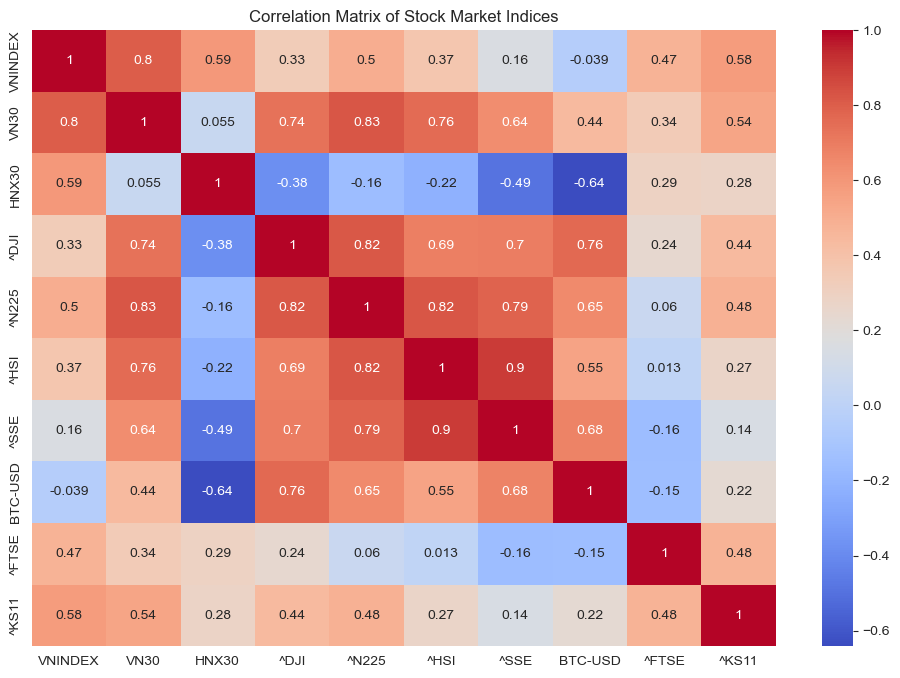

In [ ]:
# ƒê·ªçc d·ªØ li·ªáu t·ª´ csv trong folder price
dji_prices = pd.read_csv('price_index/DJI.csv')
n225_prices = pd.read_csv('price_index/N225.csv')
hsi_prices = pd.read_csv('price_index/HSI.csv')
vnindex_prices = pd.read_csv('price_index/VNI.csv')
vn30_prices = pd.read_csv('price_index/VN30.csv')
hnx30_prices = pd.read_csv('price_index/HNX30.csv')
sse_prices = pd.read_csv('price_index/SSE.csv')
btc_prices = pd.read_csv('price_index/BTC.csv')
ftse_prices = pd.read_csv('price_index/FTSE.csv')
ks11_prices = pd.read_csv('price_index/KS11.csv')

# Chuy·ªÉn c·ªôt 'time' sang ƒë·ªãnh d·∫°ng datetime
vnindex_prices['time'] = pd.to_datetime(vnindex_prices['  time'], format='mixed')
vn30_prices['time'] = pd.to_datetime(vn30_prices['time'], format='mixed')
hnx30_prices['time'] = pd.to_datetime(hnx30_prices['time'], format='mixed')
dji_prices['time'] = pd.to_datetime(dji_prices['time'], format='mixed')
n225_prices['time'] = pd.to_datetime(n225_prices['time'], format='mixed')
hsi_prices['time'] = pd.to_datetime(hsi_prices['time'], format='mixed')
sse_prices['time'] = pd.to_datetime(sse_prices['time'], format='mixed')
btc_prices['time'] = pd.to_datetime(btc_prices['time'], format='mixed')
ftse_prices['time'] = pd.to_datetime(ftse_prices['time'], format='mixed')
ks11_prices['time'] = pd.to_datetime(ks11_prices['time'], format='mixed')

# Align the lengths of the price data with the date range
date_range = pd.date_range(start="2024-09-04", end="2024-11-08", freq='D')

# Reindex the price data to match the date range and fill missing values
vnindex_prices = vnindex_prices.set_index('time').reindex(date_range).ffill().bfill().reset_index()
vn30_prices = vn30_prices.set_index('time').reindex(date_range).ffill().bfill().reset_index()
hnx30_prices = hnx30_prices.set_index('time').reindex(date_range).ffill().bfill().reset_index()
dji_prices = dji_prices.set_index('time').reindex(date_range).ffill().bfill().reset_index()
n225_prices = n225_prices.set_index('time').reindex(date_range).ffill().bfill().reset_index()
hsi_prices = hsi_prices.set_index('time').reindex(date_range).ffill().bfill().reset_index()
sse_prices = sse_prices.set_index('time').reindex(date_range).ffill().bfill().reset_index()
btc_prices = btc_prices.set_index('time').reindex(date_range).ffill().bfill().reset_index()
ftse_prices = ftse_prices.set_index('time').reindex(date_range).ffill().bfill().reset_index()
ks11_prices = ks11_prices.set_index('time').reindex(date_range).ffill().bfill().reset_index()

data = {
    "time": date_range,
    "VNINDEX": vnindex_prices['close'],
    "VN30": vn30_prices['close'],
    "HNX30": hnx30_prices['close'],
    "^DJI": dji_prices['close'],
    "^N225": n225_prices['close'],
    "^HSI": hsi_prices['close'],
    "^SSE": sse_prices['close'],
    "BTC-USD": btc_prices['close'],
    "^FTSE": ftse_prices['close'],
    "^KS11": ks11_prices['close']
}

# T·∫°o DataFrame
mock_df = pd.DataFrame(data)

# T√≠nh to√°n ma tr·∫≠n t∆∞∆°ng quan
correlation_matrix = mock_df.drop(columns=["time"]).corr()
correlation_matrix

# T·∫°o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Stock Market Indices')
plt.show()

Nh·∫≠n x√©t:
    - VN30 v√† VNINDEX


### Ph√¢n t√≠ch b√¨nh lu·∫≠n

#### 1. T·∫°o `wordcloud` t·ª´ `replies_df` ƒë·ªÉ hi·ªÉn th·ªã c√°c t·ª´ ph·ªï bi·∫øn trong ph·∫£n h·ªìi

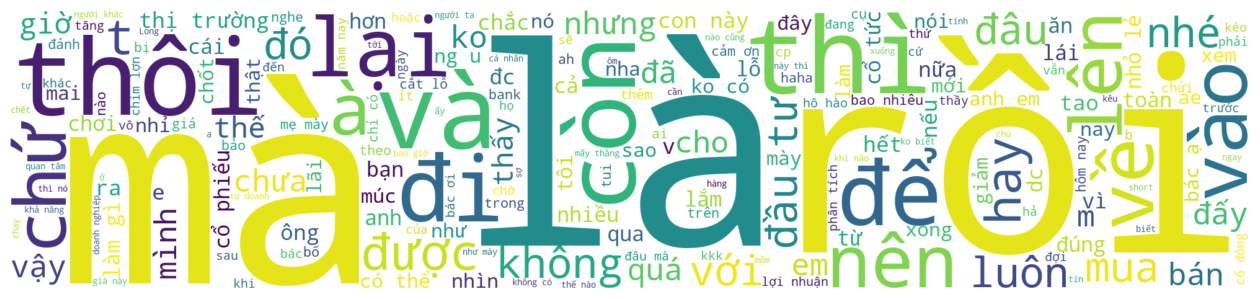

In [28]:

# K·∫øt h·ª£p t·∫•t c·∫£ vƒÉn b·∫£n t·ª´ c·ªôt 'originalContent'
text_filtered = " ".join(content for content in replies_df.originalContent)

# T·∫°o wordcloud
wordcloud_filtered = WordCloud(width=2000, height=450, background_color='white').generate(text_filtered)

plt.figure(figsize=(16, 6))
plt.imshow(wordcloud_filtered, interpolation='bilinear')
plt.axis('off')
plt.show()


In [29]:
# T√≠nh s·ªë l·∫ßn c√°c t·ª´ xu·∫•t hi·ªán
word_counts = Counter(words)

# T·∫°o dataframe t·ª´ k·∫øt qu·∫£
word_counts_df = pd.DataFrame(word_counts.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)

# Hi·ªÉn th·ªã
word_counts_df.head(20)

word  count
355     c√≥  86210
150     l√†  69733
217     v√†  60420
209    gi√°  55651
17    tƒÉng  54028
197    th√¨  51827
203    n√†y  49917
392    mua  49884
365    c√°c  49813
294    b√°n  49239
36      c·ªï  47849
227  trong  46232
87     cho  46024
226    l·∫°i  44092
164    r·ªìi  40750
18       1  39259
413    c·ªßa  38292
11      v·ªÅ  37849
147    ƒë·∫ßu  37800
416    v·ªõi  37378

In [30]:
# T·∫°o dataframe m·ªõi ch·ª©a ng√†y, s·ªë l∆∞·ª£ng ph·∫£n h·ªìi, sentiment v√† username
replies_summary = replies_df.loc[:, ['date', 'postID', 'originalContent', 'sentiment', 'username']]
replies_summary['reply_length'] = replies_summary['originalContent'].apply(lambda x: len(x))
replies_summary['sentiment'] = replies_summary['sentiment'].astype('string')
replies_summary['sentiment'] = replies_summary['sentiment'].replace({'1': 'positive', '0': 'neutral', '-1': 'negative'})
replies_summary['username'] = replies_summary['username'].astype('string')
replies_summary

date    postID  \
0     2024-11-06 16:37:32.923000+07:00  29100636   
1     2024-11-06 16:35:32.107000+07:00  29100614   
2     2024-11-06 16:34:42.663000+07:00  29100602   
3     2024-11-06 16:34:04.070000+07:00  29100595   
4     2024-11-06 16:33:33.900000+07:00  29100584   
...                                ...       ...   
75505 2024-09-06 09:07:18.413000+07:00  28005671   
75506 2024-09-06 09:07:13.367000+07:00  28005666   
75507 2024-09-06 09:06:41.837000+07:00  28005646   
75508 2024-09-06 09:06:20.447000+07:00  28005631   
75509 2024-09-06 09:06:01.853000+07:00  28005623   

                                         originalContent sentiment  \
0      B√°c c√≥ th·ªÉ ƒë∆∞a ra k·ªãch b·∫£n r·∫±ng : H·ªç sai!\nS·ªë ...   neutral   
1      Sao s·ªë li·ªáu t·ª± doanh m·ªói n∆°i m·ªói kh√°c nh·ªâ, nay...   neutral   
2      hi·ªán basic c·∫°n c·∫£ cung c·∫£ c·∫ßu. Nn tho√°t basic ...   neutral   
3                          :)) b√°c l·∫°i chu·∫©n b√†i qu√° ƒë√≥.   neutral   
4      r√µ r√†ng ph·∫£i c√≥ ch·ªØ N·∫æU, l·ª° ko ƒëc c√≤n c√≥ c√°i m...   neutral   
...                                                  ...       ...   
75505                  ‚òéLh ƒë·∫ßu t∆∞ SƒêT/Zalo: 0934 318 921   neutral   
75506       A.C tham gia c·ªông ƒë·ªìng L∆∞·ª£ng VPAüïä ·ªü ƒë√¢y nh√©üëá   neutral   
75507  3‚Ä¢\tKhuy·∫øn ngh·ªã\nB√ÅN CH·ªêT L·ªúI v√† QU·∫¢N TR·ªä R·ª¶I ...   neutral   
75508  2. ‚Ä¢\tKhuy·∫øn ngh·ªã\nB√ÅN CH·ªêT L·ªúI FTS\nGi√° b√°n :...   neutral   
75509  1. ‚Ä¢\tKhuy·∫øn ngh·ªã\nB√ÅN CH·ªêT L·ªúI FPT\nGi√° b√°n :...   neutral   

              username  reply_length  
0                  NDC            80  
1                Alex             90  
2      Upgrading to Fo           752  
3                  NDC            29  
4             T√πng C·∫≠n            59  
...                ...           ...  
75505        L∆∞·ª£ng VPA            33  
75506        L∆∞·ª£ng VPA            44  
75507        L∆∞·ª£ng VPA           547  
75508        L∆∞·ª£ng VPA           426  
75509        L∆∞·ª£ng VPA           482  

[75510 rows x 6 columns]

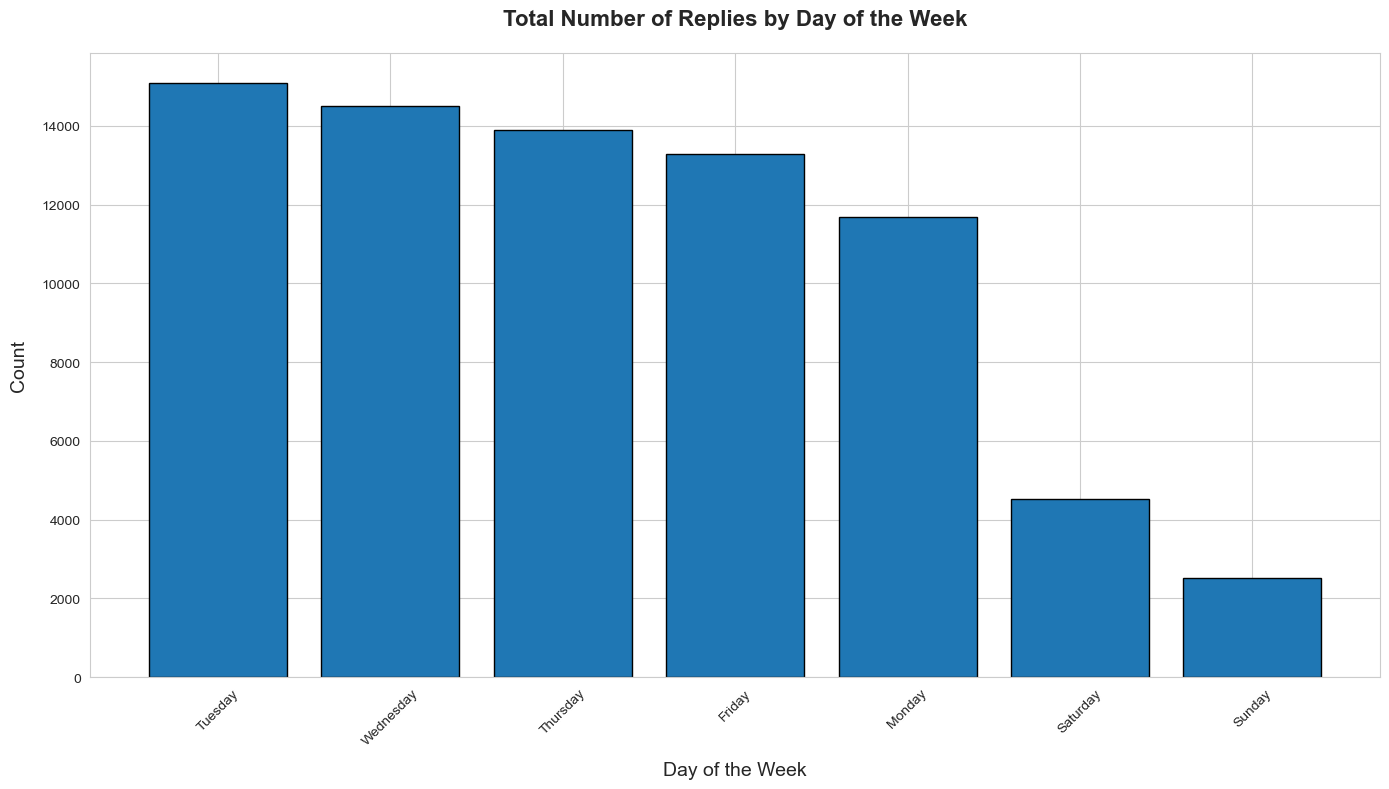

In [31]:
# T·∫°o column chart cho s·ªë l∆∞·ª£ng ph·∫£n h·ªìi theo th·ª© trong tu·∫ßn
replies_summary['day_of_week'] = replies_summary['date'].dt.day_name()
replies_summary['day_of_week'] = pd.Categorical(replies_summary['day_of_week'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
replies_by_day = replies_summary['day_of_week'].value_counts().reset_index()
replies_by_day.columns = ['day_of_week', 'count']

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(14, 8))
plt.bar(replies_by_day['day_of_week'], replies_by_day['count'], color='#1f77b4', edgecolor='black')

# Th√™m nh√£n v√† ch√∫ th√≠ch
plt.title('Total Number of Replies by Day of the Week', fontsize=16, weight='bold', pad=20)
plt.xlabel('Day of the Week', fontsize=14, labelpad=10)
plt.ylabel('Count', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.tight_layout()
plt.show()


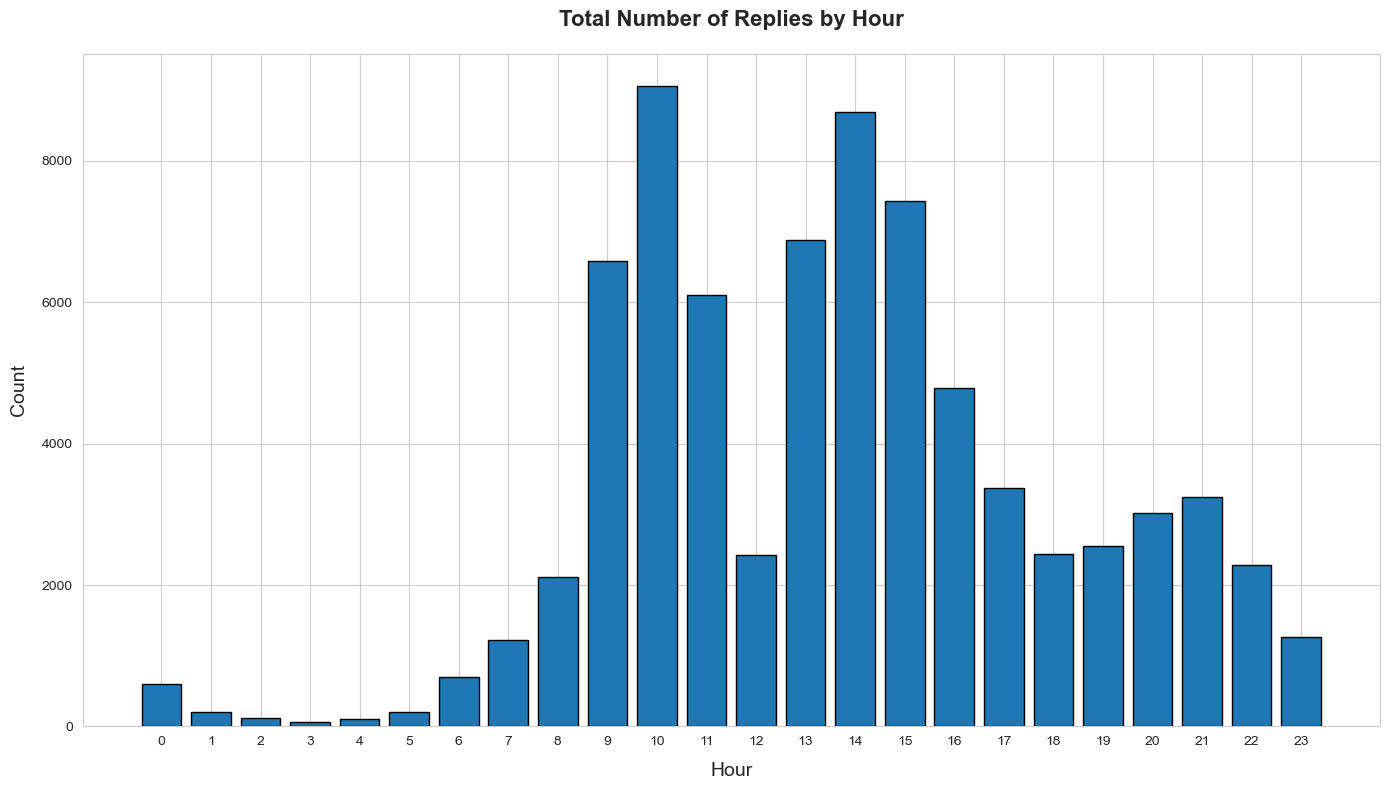

In [32]:
# Chuy·ªÉn ƒë·ªïi c·ªôt 'date' sang ƒë·ªãnh d·∫°ng datetime n·∫øu ch∆∞a ƒë∆∞·ª£c chuy·ªÉn ƒë·ªïi
replies_summary['date'] = pd.to_datetime(replies_summary['date'], format='ISO8601')

# T·∫°o column chart cho s·ªë l∆∞·ª£ng ph·∫£n h·ªìi theo gi·ªù.
reply_counts_by_hour = replies_summary.groupby(replies_summary['date'].dt.hour).size().reset_index()
reply_counts_by_hour.columns = ['hour', 'reply_count']

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(14, 8))
plt.bar(reply_counts_by_hour['hour'], reply_counts_by_hour['reply_count'], color='#1f77b4', edgecolor='black')

# Th√™m nh√£n v√† ch√∫ th√≠ch
plt.title('Total Number of Replies by Hour', fontsize=16, weight='bold', pad=20)
plt.xlabel('Hour', fontsize=14, labelpad=10)
plt.ylabel('Count', fontsize=14, labelpad=10)
plt.xticks(reply_counts_by_hour['hour'], fontsize=10)
plt.yticks(fontsize=10)

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.tight_layout()
plt.show()


In [33]:
# T√¨m user c√≥ l∆∞·ª£t b√¨nh lu·∫≠n t·ª´ nhi·ªÅu nh·∫•t ƒë·∫øn √≠t nh·∫•t
top_repliers = replies_df['username'].value_counts().reset_index()
top_repliers.columns = ['username', 'numofreplies']
top_repliers.head(20)

username  numofreplies
0                                     NDC          1808
1                           „Ö§„Ö§  „Ö§Ch√™nh Q9           660
2                      Minh Nguy·ªÖn Invest           532
3                              Vi·ªát Stock           459
4                                 H·ªØu Nam           423
5                               L∆∞·ª£ng VPA           410
6                                Game SBT           379
7      Tri·ªát Quy·ªÅn ƒê·∫°o(Tri·ªát Chim G√† L·ª£n)           362
8                               Doan Nhan           357
9                                 Nam Dao           344
10                        Nhang Nh·ªì Nh·∫°ng           290
11               BITCOIN 600K$ (M·∫†C DANH)           270
12                            Thanh H∆∞∆°ng           261
13                              Tu·∫•n Gvin           250
14                         Monkey D.Luffy           249
15                                T√≠m T√°i           239
16                                 BAO LE           230
17                                  DADDY           223
18  Hi·ªáu Qu·∫£ ƒê·∫ßu T∆∞ 28,9% T·ª´ ƒê·∫ßu NƒÉm :)))           222
19                         Chim L·ª£n Ch√∫a            211

Li·ªáu r·∫±ng username c√≥ ·∫£nh h∆∞·ªüng ƒë·∫øn s·ªë l∆∞·ª£ng t∆∞∆°ng t√°c c·ªßa b√†i vi·∫øt kh√¥ng.

In [34]:
# tr√≠ch xu·∫•t th√¥ng tin t·ª´ 100 b√†i vi·∫øt c√≥ l∆∞·ª£t b√¨nh lu·∫≠n cao nh·∫•t
top_100_replies = posts_summary.sort_values(by='total_replies', ascending=False).head(100)
top_100_replies

date    postID  \
245929 2024-09-26 13:20:06.443000+07:00  28340183   
4      2024-10-03 15:27:47.050000+07:00  28483887   
138448 2024-09-13 14:50:29.640000+07:00  28124694   
13     2024-11-06 15:27:39.133000+07:00  29099549   
0      2024-10-24 15:19:54.307000+07:00  28869167   
...                                 ...       ...   
197283 2024-10-15 18:43:58.110000+07:00  28690984   
9009   2024-09-28 12:53:17.447000+07:00  28382940   
24073  2024-10-26 11:00:47.683000+07:00  28901061   
24     2024-09-23 15:24:40.777000+07:00  28273511   
619    2024-10-28 17:24:20.513000+07:00  28924956   

                                          originalContent sentiment  \
245929                                Th·ª©c d·∫≠y ƒëi ch√∫ ƒê·∫°t   neutral   
4       Ph√°i Sinh ng√†y 3/10/2024\n.\n- Hnay T√¢y Short ...   neutral   
138448  L√™n ƒëc t√≠ xanh ƒë·ªÉ ƒë·ª° ph·∫£i b·ªã d√¢n t√¨nh ch·ª≠i √†h!...   neutral   
13      Ph√°i Sinh ng√†y 6/11/2024\n.\n- Hnay T√¢y Long r...   neutral   
0       Ph√°i Sinh ng√†y 24/10/2024\n.\n- Hnay T√¢y Short...   neutral   
...                                                   ...       ...   
197283                                  12 gi·ªØ dc ko a e    neutral   
9009    Huynh cho ƒë·ªá h·ªèi ƒë√°nh ch·ª©ng kho√°n c√≥ d·ªÖ l√£i th...   neutral   
24073   ISRAEL - IRAN L·∫†I T·ªî CH·ª®C T·∫¨P TR·∫¨N CHUNG, L·∫¶N ...   neutral   
24      Ph√°i Sinh ng√†y 23/9/2024\n.\n- Hnay T√¢y Short ...   neutral   
619     Tin ch√≠nh th·ª©c nh√©. \nLN n√†y 263 t·ª∑, tƒÉng 300%...   neutral   

                                            taggedSymbols  post_length  \
245929                   [{"symb": "PDR", "price": 22.9}]           19   
4       [{"symb": "$BTC", "price": 61459.01}, {"symb":...          774   
138448  [{"symb": "DIG", "price": 22.0}, {"symb": "VNI...          181   
13      [{"symb": "^DJI", "price": 42221.88}, {"symb":...          841   
0       [{"symb": "^DJI", "price": 42514.95}, {"symb":...          836   
...                                                   ...          ...   
197283                   [{"symb": "VIX", "price": 11.3}]           17   
9009    [{"symb": "CTG", "price": 37.0}, {"symb": "HCM...           85   
24073   [{"symb": "EIB", "price": 20.85}, {"symb": "HH...          357   
24      [{"symb": "^DJI", "price": 42124.65}, {"symb":...          682   
619                      [{"symb": "TCH", "price": 15.7}]          130   

        total_likes  total_replies  
245929            0            693  
4                62            151  
138448            1            137  
13               55            130  
0                69            125  
...             ...            ...  
197283            0             50  
9009              4             50  
24073             3             49  
24               50             49  
619              14             49  

[100 rows x 8 columns]

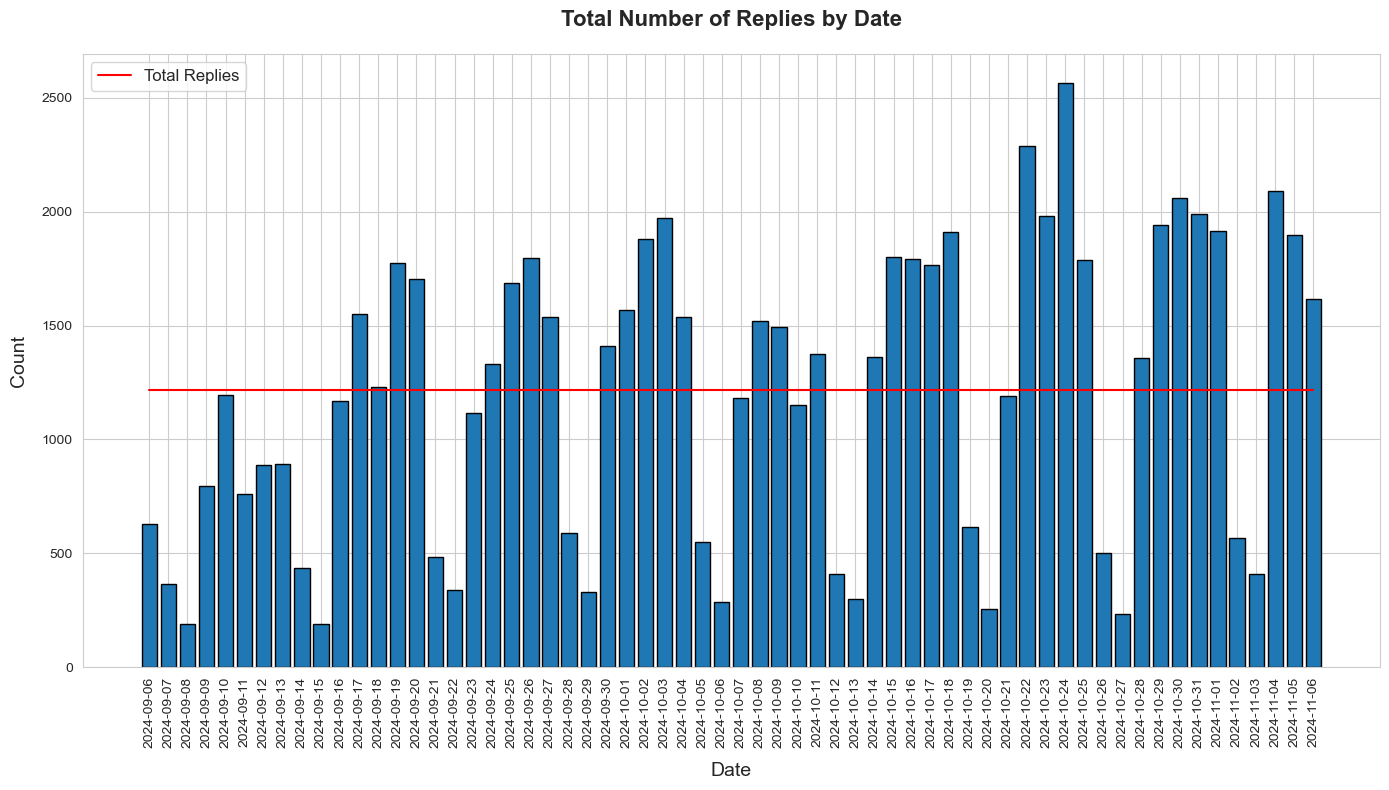

In [ ]:
# Chuy·ªÉn ƒë·ªïi c·ªôt 'date' sang ƒë·ªãnh d·∫°ng datetime
replies_df['date'] = pd.to_datetime(replies_df['date'], format='ISO8601')

# T·∫°o dataframe m·ªõi ch·ª©a ng√†y, s·ªë l∆∞·ª£ng ph·∫£n h·ªìi
reply_counts_by_date = replies_df.groupby(pd.Grouper(key='date', freq='D')).size().reset_index()
reply_counts_by_date.columns = ['date', 'reply_count']
reply_counts_by_date['date'] = reply_counts_by_date['date'].dt.strftime('%Y-%m-%d')

# T·∫°o bi·ªÉu ƒë·ªì c·ªôt
plt.figure(figsize=(14, 8))
plt.bar(reply_counts_by_date['date'], reply_counts_by_date['reply_count'], color='#1f77b4', edgecolor='black')
plt.plot(reply_counts_by_date['date'], [reply_counts_by_date['reply_count'].mean()] * len(reply_counts_by_date['date']), color='red')
# Th√™m nh√£n v√† ch√∫ th√≠ch
plt.title('Total Number of Replies by Date', fontsize=16, weight='bold', pad=20)
plt.xlabel('Date', fontsize=14, labelpad=10)
plt.ylabel('Count', fontsize=14, labelpad=10)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['Total Replies'], fontsize=12, loc='upper left')

# TƒÉng kho·∫£ng c√°ch v√† hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.tight_layout()
plt.show()

# in ra gi√° tr·ªã trung b√¨nh c·ªßa s·ªë l∆∞·ª£ng b√¨nh lu·∫≠n

C:\Users\DELL Pre 7670\AppData\Local\Temp\ipykernel_14856\3001731444.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\DELL Pre 7670\AppData\Local\Temp\ipykernel_14856\3001731444.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\DELL Pre 7670\AppData\Local\Temp\ipykernel_14856\3001731444.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL Pre 7670\AppData\Local\Temp\ipykernel_14856\3001731444.py:40: SettingWithCopyWarning:


A value is

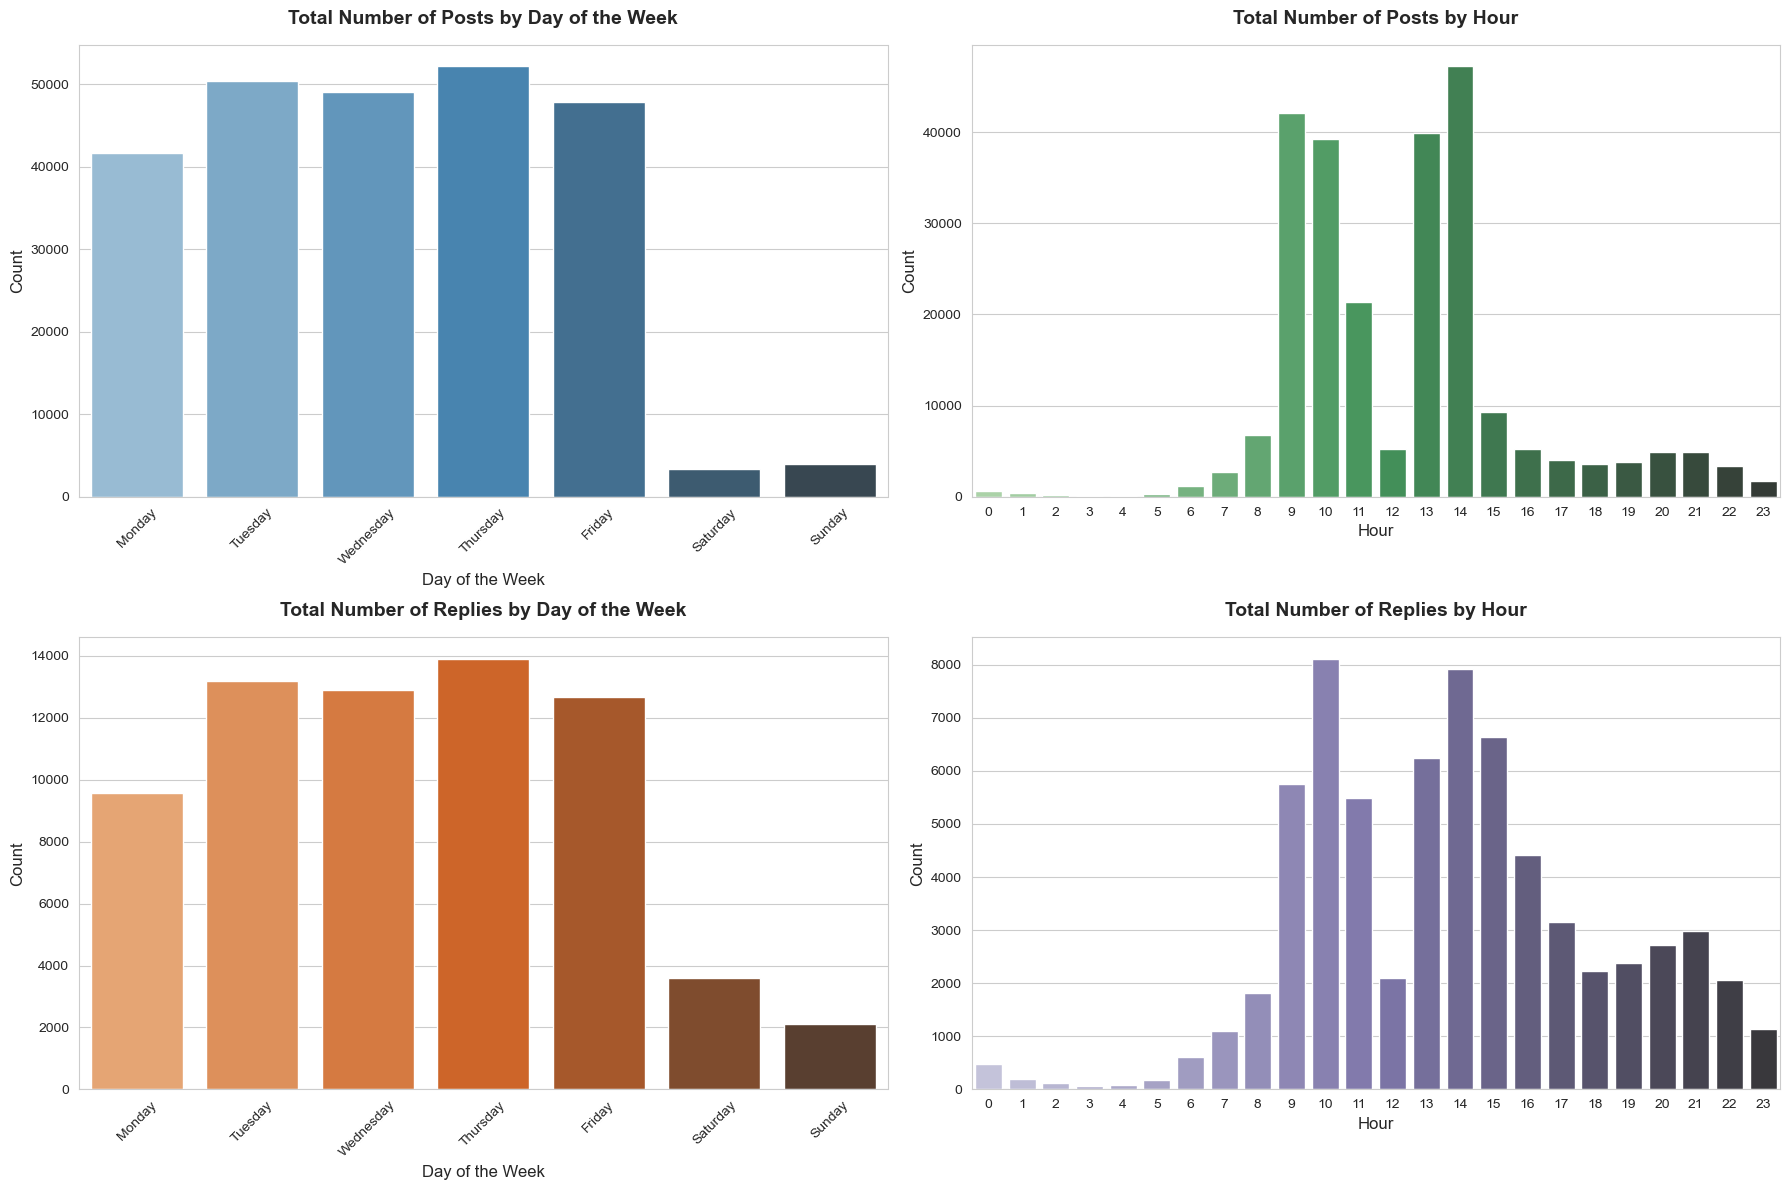

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

start_date = '2024-09-08'
end_date = '2024-11-02'

posts_df = posts_df[(posts_df['date'] >= start_date) & (posts_df['date'] <= end_date)]
replies_summary = replies_summary[(replies_summary['date'] >= start_date) & (replies_summary['date'] <= end_date)]


# Thi·∫øt l·∫≠p b·∫£ng m√†u v√† phong c√°ch
sns.set_palette("pastel")
sns.set_style("whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# 1. S·ªë l∆∞·ª£ng b√†i vi·∫øt theo th·ª© trong tu·∫ßn
posts_df['day_of_week'] = posts_df['date'].dt.day_name()
posts_df['day_of_week'] = pd.Categorical(posts_df['day_of_week'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
posts_by_day = posts_df['day_of_week'].value_counts().reset_index()
posts_by_day.columns = ['day_of_week', 'count']
sns.barplot(data=posts_by_day, x='day_of_week', y='count', ax=axs[0, 0], palette="Blues_d")
axs[0, 0].set_title('Total Number of Posts by Day of the Week', fontsize=14, weight='bold', pad=15)
axs[0, 0].set_xlabel('Day of the Week', fontsize=12)
axs[0, 0].set_ylabel('Count', fontsize=12)
axs[0, 0].tick_params(axis='x', rotation=45)

# 2. S·ªë l∆∞·ª£ng b√†i vi·∫øt theo gi·ªù
post_counts_by_hour = posts_df.groupby(posts_df['date'].dt.hour).size().reset_index()
post_counts_by_hour.columns = ['hour', 'post_count']
sns.barplot(data=post_counts_by_hour, x='hour', y='post_count', ax=axs[0, 1], palette="Greens_d")
axs[0, 1].set_title('Total Number of Posts by Hour', fontsize=14, weight='bold', pad=15)
axs[0, 1].set_xlabel('Hour', fontsize=12)
axs[0, 1].set_ylabel('Count', fontsize=12)

# 3. S·ªë l∆∞·ª£ng ph·∫£n h·ªìi theo th·ª© trong tu·∫ßn
replies_summary['day_of_week'] = replies_summary['date'].dt.day_name()
replies_summary['day_of_week'] = pd.Categorical(replies_summary['day_of_week'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
replies_by_day = replies_summary['day_of_week'].value_counts().reset_index()
replies_by_day.columns = ['day_of_week', 'count']
sns.barplot(data=replies_by_day, x='day_of_week', y='count', ax=axs[1, 0], palette="Oranges_d")
axs[1, 0].set_title('Total Number of Replies by Day of the Week', fontsize=14, weight='bold', pad=15)
axs[1, 0].set_xlabel('Day of the Week', fontsize=12)
axs[1, 0].set_ylabel('Count', fontsize=12)
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. S·ªë l∆∞·ª£ng ph·∫£n h·ªìi theo gi·ªù
reply_counts_by_hour = replies_summary.groupby(replies_summary['date'].dt.hour).size().reset_index()
reply_counts_by_hour.columns = ['hour', 'reply_count']
sns.barplot(data=reply_counts_by_hour, x='hour', y='reply_count', ax=axs[1, 1], palette="Purples_d")
axs[1, 1].set_title('Total Number of Replies by Hour', fontsize=14, weight='bold', pad=15)
axs[1, 1].set_xlabel('Hour', fontsize=12)
axs[1, 1].set_ylabel('Count', fontsize=12)

# Tinh ch·ªânh kho·∫£ng c√°ch v√† hi·ªÉn th·ªã
plt.tight_layout()
plt.show()


### Ph√¢n t√≠ch nh·∫≠n ƒë·ªãnh

In [37]:
# Tr√≠ch xu·∫•t m√£ t·ª´ c·ªôt 'taggedSymbols'
posts_df['symbols'] = posts_df['taggedSymbols'].apply(lambda x: [d['symb'] for d in eval(x)])

# T·∫°o m·ªôt dataframe m·ªõi ch·ª©a c√°c m√£ v√† sentiment
symbols_df = posts_df.explode('symbols')[['symbols', 'sentiment']]

# ƒê·∫øm s·ªë l∆∞·ª£ng xu·∫•t hi·ªán c·ªßa m·ªói m√£
symbol_counts = symbols_df['symbols'].value_counts().reset_index()
symbol_counts.columns = ['symbol', 'count']

# K·∫øt h·ª£p v·ªõi sentiment
result_df = symbols_df.groupby('symbols')['sentiment'].first().reset_index()
result_df = result_df.merge(symbol_counts, left_on='symbols', right_on='symbol').drop(columns=['symbols'])

# S·∫Øp x·∫øp theo l∆∞·ª£t xu·∫•t hi·ªán c·ªßa m√£ gi·∫£m d·∫ßn
result_df = result_df.sort_values(by='count', ascending=False).reset_index(drop=True)

# X√≥a c·ªôt 'sentiment'
result_df = result_df.drop(columns=['sentiment'])

# Th√™m c√°c c·ªôt m·ªõi
result_df['positive'] = symbols_df[symbols_df['sentiment'] == 'positive'].groupby('symbols').size().reindex(result_df['symbol'], fill_value=0).values
result_df['neutral'] = symbols_df[symbols_df['sentiment'] == 'neutral'].groupby('symbols').size().reindex(result_df['symbol'], fill_value=0).values
result_df['negative'] = symbols_df[symbols_df['sentiment'] == 'negative'].groupby('symbols').size().reindex(result_df['symbol'], fill_value=0).values

result_df


symbol  count  positive  neutral  negative
0     VNINDEX  49891      8192    38502      3197
1         HPG  12081      2956     8592       533
2         VHM  11109      1773     8756       580
3     VN30F1M  10356      2063     7698       595
4         DXG   9452      2130     6909       413
...       ...    ...       ...      ...       ...
1425      RCD      1         1        0         0
1426   RBEX24      1         0        1         0
1427    QWZ24      1         0        1         0
1428    QWK25      1         0        1         0
1429      L62      1         0        1         0

[1430 rows x 5 columns]

C:\Users\DELL Pre 7670\AppData\Local\Temp\ipykernel_14856\522797988.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



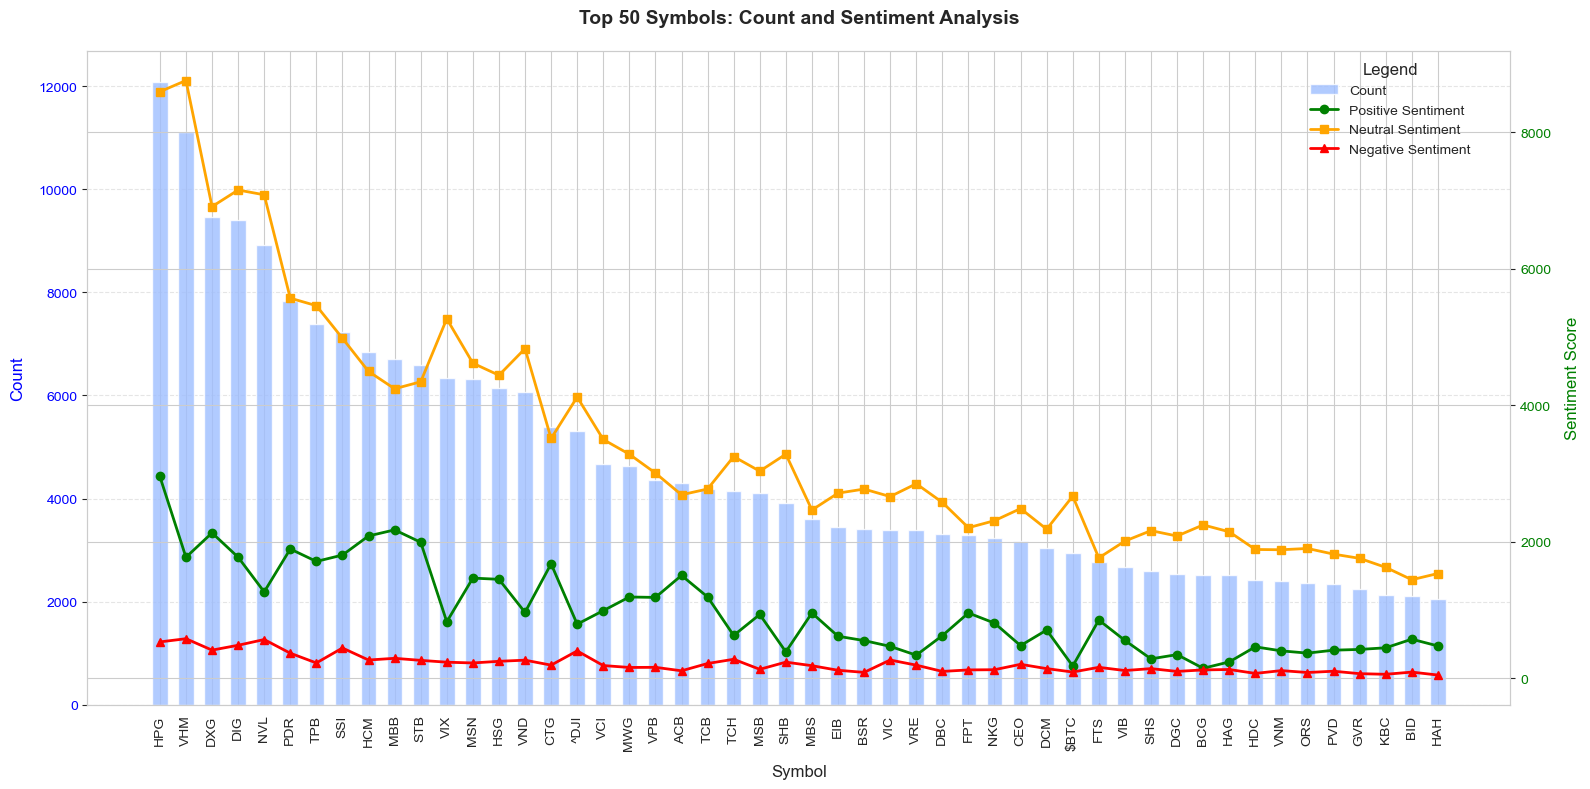

In [ ]:
# L·ªçc b·ªè c√°c m√£ kh√¥ng c·∫ßn thi·∫øt
filtered_result_df = result_df[~result_df['symbol'].isin(['VN30', 'VN30F1M', 'VNINDEX'])]

# L·∫•y top 50 symbols
top_50_df = filtered_result_df[:50]

# T·∫°o bi·ªÉu ƒë·ªì
fig, ax1 = plt.subplots(figsize=(16, 8))

# Bi·ªÉu ƒë·ªì c·ªôt cho s·ªë l∆∞·ª£ng xu·∫•t hi·ªán
bar_width = 0.6
colors = sns.color_palette("coolwarm", as_cmap=True)  # D√πng palette ƒë·∫πp t·ª´ seaborn
ax1.bar(
    top_50_df['symbol'], 
    top_50_df['count'], 
    color=colors(0.3), 
    alpha=0.8, 
    width=bar_width, 
    label='Count'
)
ax1.set_xlabel('Symbol', fontsize=12, labelpad=10)
ax1.set_ylabel('Count', fontsize=12, color='b', labelpad=10)
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(top_50_df['symbol'], rotation=90, fontsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# T·∫°o tr·ª•c y th·ª© hai cho sentiment
ax2 = ax1.twinx()
ax2.plot(
    top_50_df['symbol'], 
    top_50_df['positive'], 
    color='g', 
    marker='o', 
    linestyle='-', 
    linewidth=2, 
    label='Positive Sentiment'
)
ax2.plot(
    top_50_df['symbol'], 
    top_50_df['neutral'], 
    color='orange', 
    marker='s', 
    linestyle='-', 
    linewidth=2, 
    label='Neutral Sentiment'
)
ax2.plot(
    top_50_df['symbol'], 
    top_50_df['negative'], 
    color='r', 
    marker='^', 
    linestyle='-', 
    linewidth=2, 
    label='Negative Sentiment'
)
ax2.set_ylabel('Sentiment Score', fontsize=12, color='g', labelpad=10)
ax2.tick_params(axis='y', labelcolor='g')

# Th√™m ch√∫ th√≠ch v√† ti√™u ƒë·ªÅ
fig.legend(
    loc="upper right", 
    bbox_to_anchor=(0.93, 0.93), 
    fontsize=10, 
    frameon=False, 
    title="Legend", 
    title_fontsize=12
)
plt.title('Top 50 Symbols: Count and Sentiment Analysis', fontsize=14, pad=20, weight='bold')

# TƒÉng kho·∫£ng c√°ch gi·ªØa c√°c th√†nh ph·∫ßn ƒë·ªÉ kh√¥ng b·ªã ch·ªìng ch√©o
fig.tight_layout()

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

?? x√©t t·ªâ l·ªá pos v√† neg

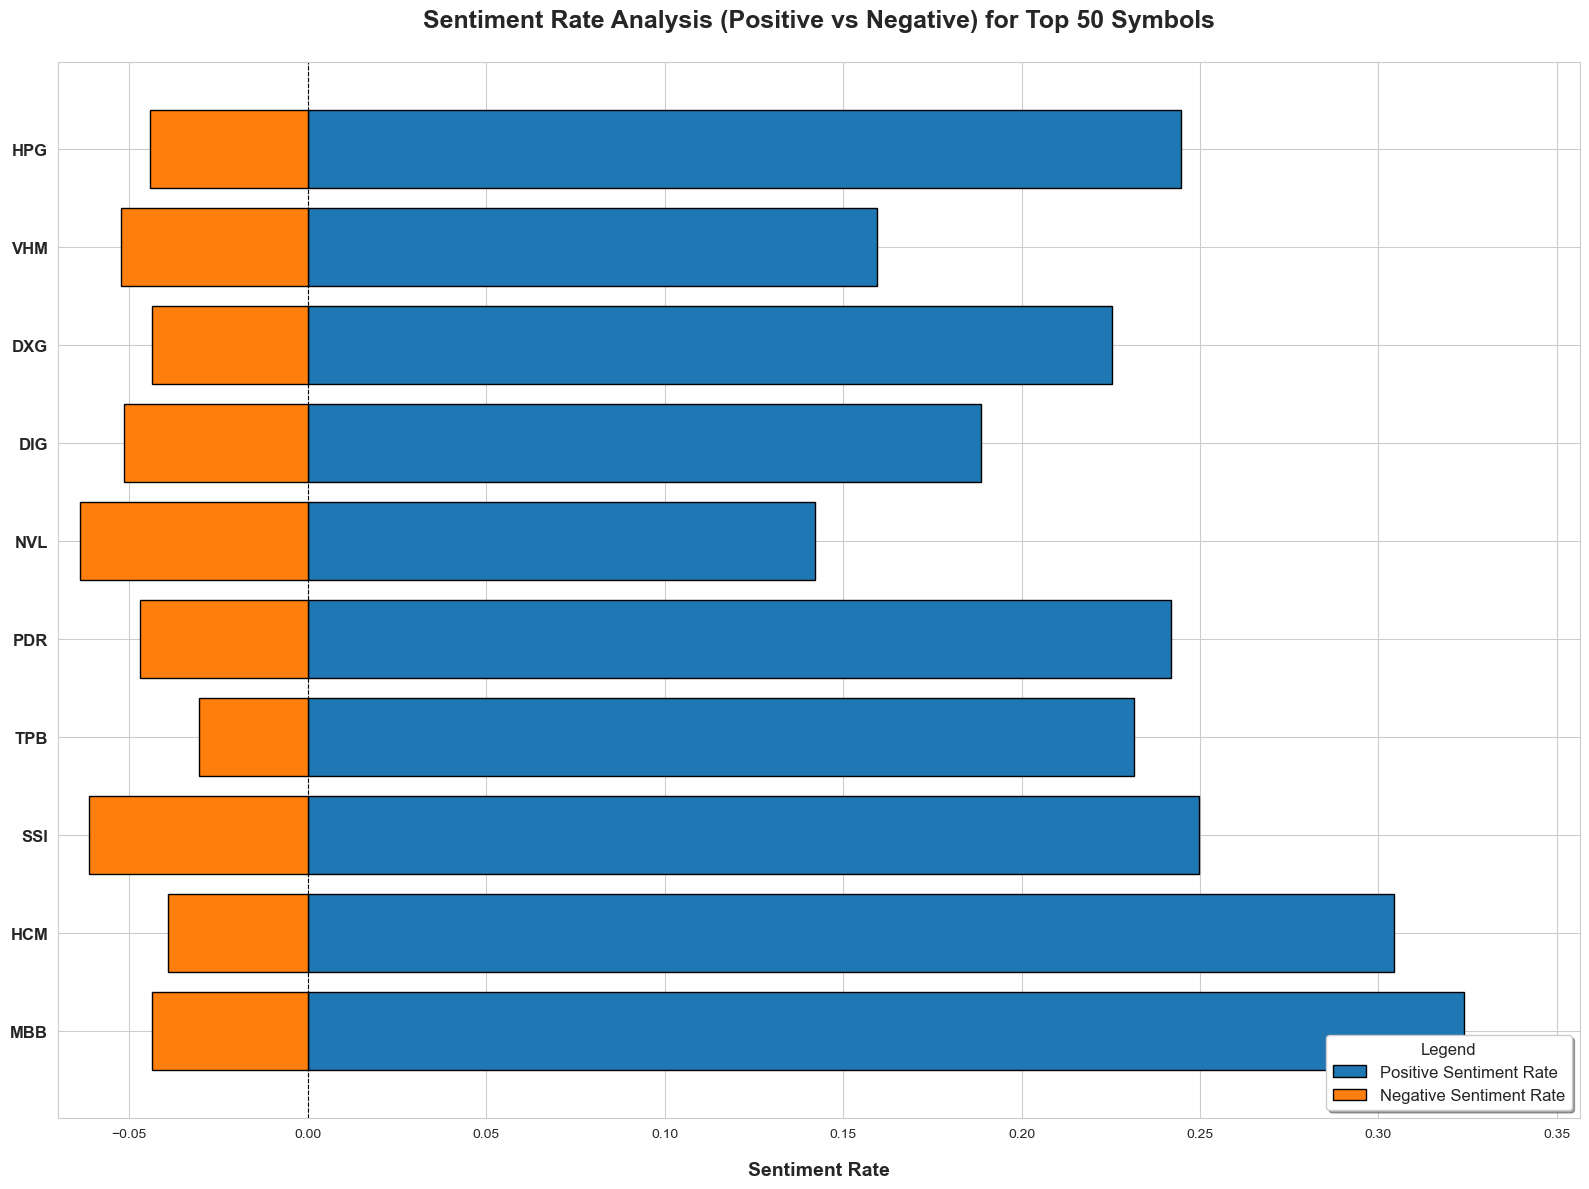

In [ ]:
# Import th∆∞ vi·ªán c·∫ßn thi·∫øt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# T·∫°o dataframe ch·ª©a t·ª∑ l·ªá sentiment
sentiment_df = result_df.copy()
sentiment_df['positive_rate'] = sentiment_df['positive'] / sentiment_df['count']
sentiment_df['negative_rate'] = sentiment_df['negative'] / sentiment_df['count']

# S·∫Øp x·∫øp theo s·ªë l·∫ßn xu·∫•t hi·ªán, l·∫•y top 50 v√† ƒë·∫£o ng∆∞·ª£c th·ª© t·ª±
sentiment_df = sentiment_df.sort_values(by='count', ascending=False).reset_index()
top_10 = sentiment_df[:10].iloc[::-1]

# Thi·∫øt l·∫≠p m√†u s·∫Øc v√† style
sns.set_palette("muted")
sns.set_style("whitegrid")

# T·∫°o bar chart
fig, ax = plt.subplots(figsize=(16, 12))

# X√¢y d·ª±ng bi·ªÉu ƒë·ªì d·∫°ng bar hai ph√≠a
x = np.arange(len(top_10))  # Index cho symbols
bar_width = 0.8

# Positive sentiment bars
ax.barh(
    x, top_10['positive_rate'],
    color='#1f77b4', edgecolor='black', height=bar_width,
    label='Positive Sentiment Rate'
)

# Negative sentiment bars
ax.barh(
    x, -top_10['negative_rate'],
    color='#ff7f0e', edgecolor='black', height=bar_width,
    label='Negative Sentiment Rate'
)

# Thi·∫øt k·∫ø c√°c nh√£n
ax.set_yticks(x)
ax.set_yticklabels(top_10['symbol'], fontsize=12, weight='bold')
ax.set_xlabel('Sentiment Rate', fontsize=14, labelpad=15, weight='bold')
ax.set_title(
    'Sentiment Rate Analysis (Positive vs Negative) for Top 10 Symbols',
    fontsize=18, weight='bold', pad=25
)

# Th√™m ƒë∆∞·ªùng tr·ª•c gi·ªØa ƒë·ªÉ d·ªÖ ph√¢n bi·ªát
ax.axvline(0, color='black', linewidth=0.8, linestyle='--')
ax.set_xlim(-max(top_10['negative_rate']) * 1.1, max(top_10['positive_rate']) * 1.1)

# Th√™m ch√∫ th√≠ch
ax.legend(
    fontsize=12, loc='lower right',
    frameon=True, shadow=True, title="Legend", title_fontsize=12
)

# ƒêi·ªÅu ch·ªânh layout ƒë·ªÉ kh√¥ng b·ªã ch·ªìng ch√©o
fig.tight_layout()

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()


T·ª´ 2 plot tr√™n ta th·∫•y r·∫±ng:
- HPG, VHM, DXG l√† c√°c m√£ ƒë∆∞·ª£c ch√∫ √Ω nhi·ªÅu nh·∫•t, v·ªõi c·∫£m x√∫c ch·ªß y·∫øu l√† trung l·∫≠p v√† t√≠ch c·ª±c.
- Ph√¢n t√≠ch n√†y c√≥ th·ªÉ g·ª£i √Ω r·∫±ng c√°c m√£ ƒë·ª©ng ƒë·∫ßu ƒëang l√† t√¢m ƒëi·ªÉm theo d√µi c·ªßa th·ªã tr∆∞·ªùng.
- Tuy nhi√™n, m·ª©c c·∫£m x√∫c ti√™u c·ª±c kh√° th·∫•p cho th·∫•y t√¢m l√Ω chung c·ªßa nh√† ƒë·∫ßu t∆∞ v·∫´n t∆∞∆°ng ƒë·ªëi ·ªïn ƒë·ªãnh.

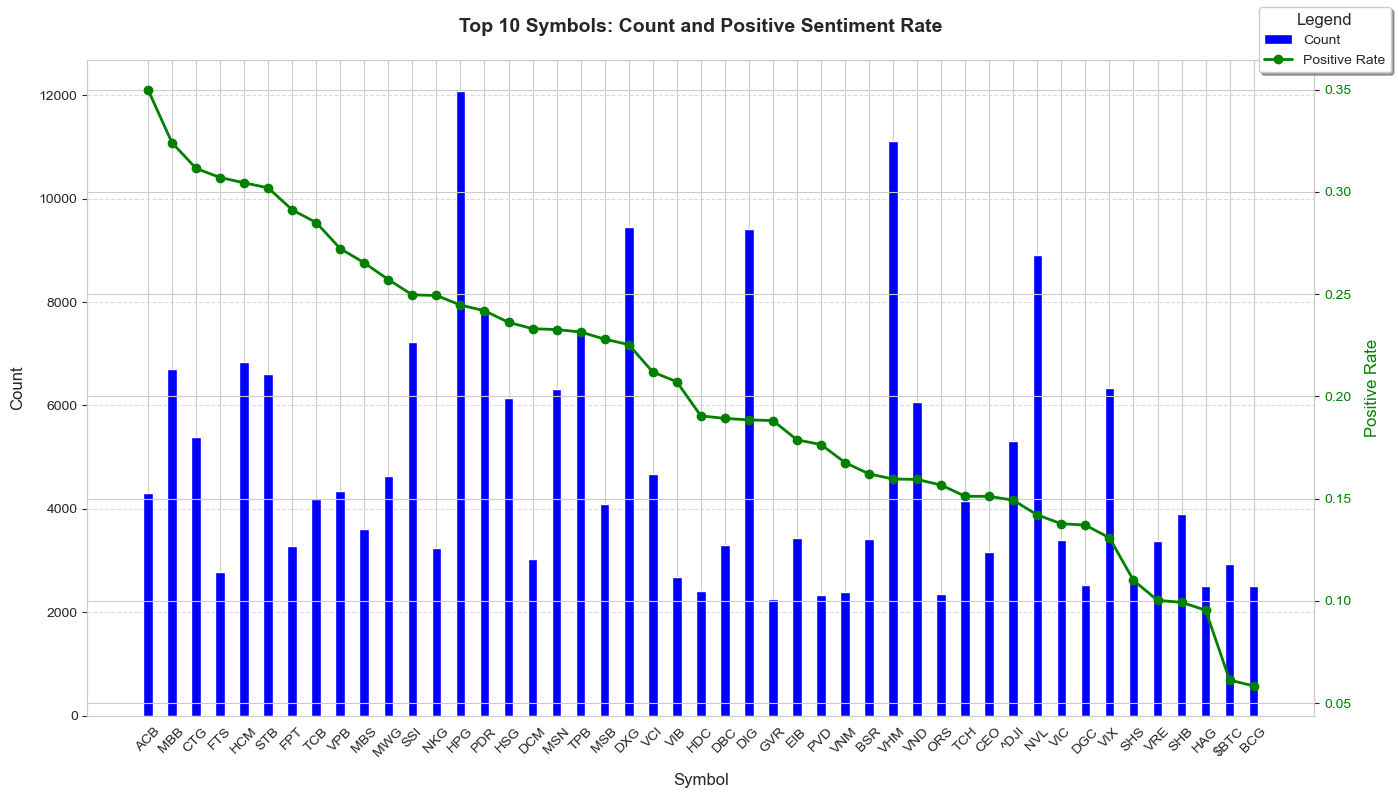

In [40]:
# S·∫Øp x·∫øp top 50 m√£ c√≥ s·ªë b√†i vi·∫øt nh·∫Øc ƒë·∫øn trong top_50 v√† s·∫Øp x·∫øp theo t·ªâ l·ªá postive cao nh·∫•t ƒë·∫øn th·∫•p nh·∫•t
top_50 = top_50.sort_values(by='count', ascending=False)
top_50 = top_50.sort_values(by='positive_rate', ascending=False)

# B·ªè c√°c c·ªôt VNINDEX, VN30F1M, VN30 kh√¥ng c·∫ßn thi·∫øt
top_50 = top_50[~top_50['symbol'].isin(['VNINDEX', 'VN30F1M', 'VN30'])]

# T·∫°o bi·ªÉu ƒë·ªì
fig, ax = plt.subplots(figsize=(14, 8))

# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt cho s·ªë l∆∞·ª£ng b√†i vi·∫øt
bar_width = 0.4
x = np.arange(len(top_50))
ax.bar(x, top_50['count'], color='b', width=bar_width, label='Count')
ax.set_xlabel('Symbol', fontsize=12, labelpad=10)
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.set_xticks(x)
ax.set_xticklabels(top_50['symbol'], fontsize=10)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# T·∫°o tr·ª•c y th·ª© hai cho t·ªâ l·ªá positive
ax2 = ax.twinx()
ax2.plot(x, top_50['positive_rate'], color='g', marker='o', linestyle='-', linewidth=2, label='Positive Rate')
ax2.set_ylabel('Positive Rate', fontsize=12, color='g', labelpad=10)
ax2.tick_params(axis='y', labelcolor='g')

# Th√™m ch√∫ th√≠ch v√† ti√™u ƒë·ªÅ
fig.legend(loc='upper right', fontsize=10, title='Legend', title_fontsize=12, frameon=True, shadow=True)
plt.title('Top 10 Symbols: Count and Positive Sentiment Rate', fontsize=14, weight='bold', pad=20)

# TƒÉng kho
fig.tight_layout()

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

In [ ]:
# 

C:\Users\DELL Pre 7670\AppData\Local\Temp\ipykernel_14856\2962568998.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




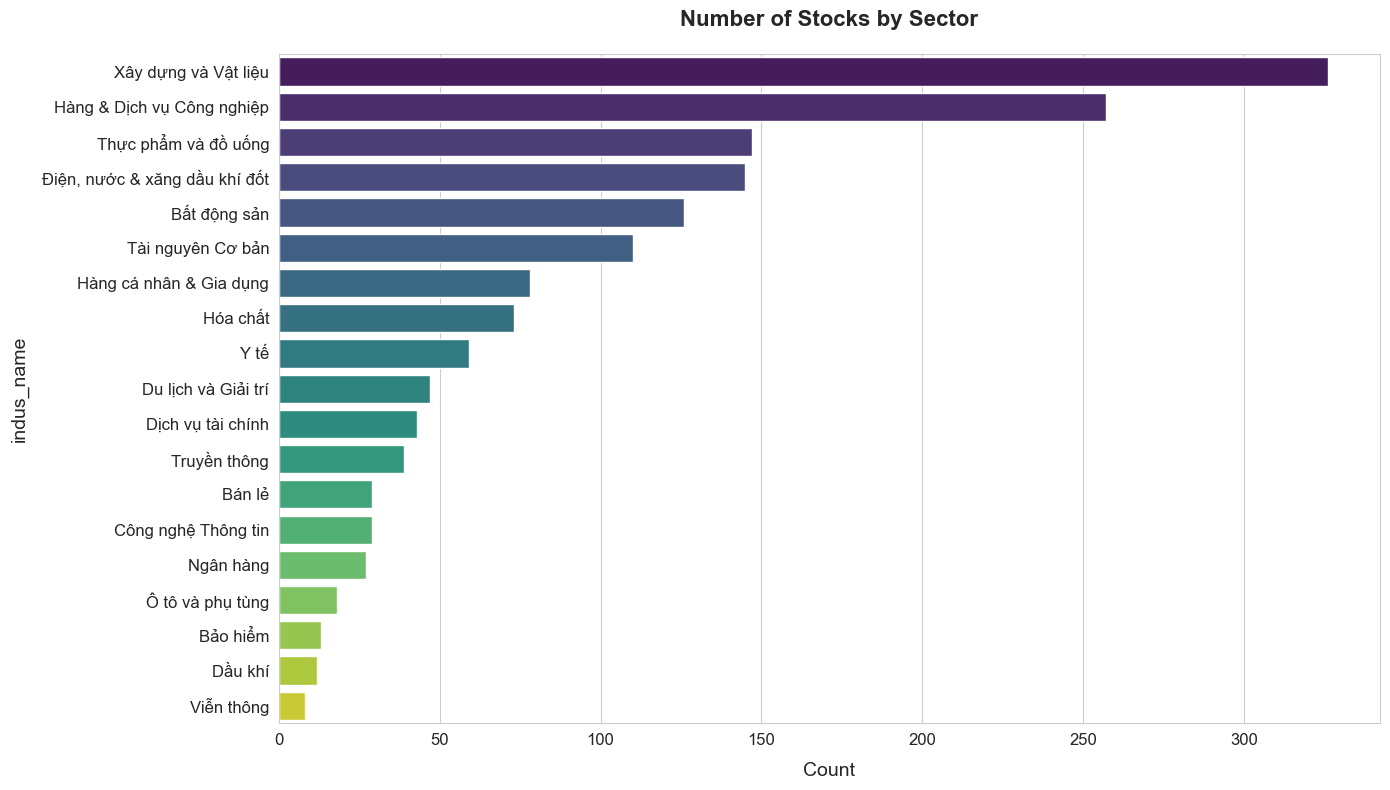

In [ ]:
# Li·ªát ng√†nh trong list_stock.csv v√† s·ªë l∆∞·ª£ng m√£ ch·ª©ng kho√°n c·ªßa m·ªói ng√†nh
sectors = pd.read_csv('list_stock.csv')
sectors['indus_name'] = sectors['indus_name'].str.strip()
sector_counts = sectors['indus_name'].value_counts().reset_index()
sector_counts.columns = ['indus_name', 'count']
sector_counts

# T·∫°o bi·ªÉu ƒë·ªì
plt.figure(figsize=(14, 8))
sns.barplot(data=sector_counts, x='count', y='indus_name', palette='viridis')
plt.title('Number of Stocks by Sector', fontsize=16, weight='bold', pad=20)
plt.xlabel('Count', fontsize=14, labelpad=10)
plt.ylabel('indus_name', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



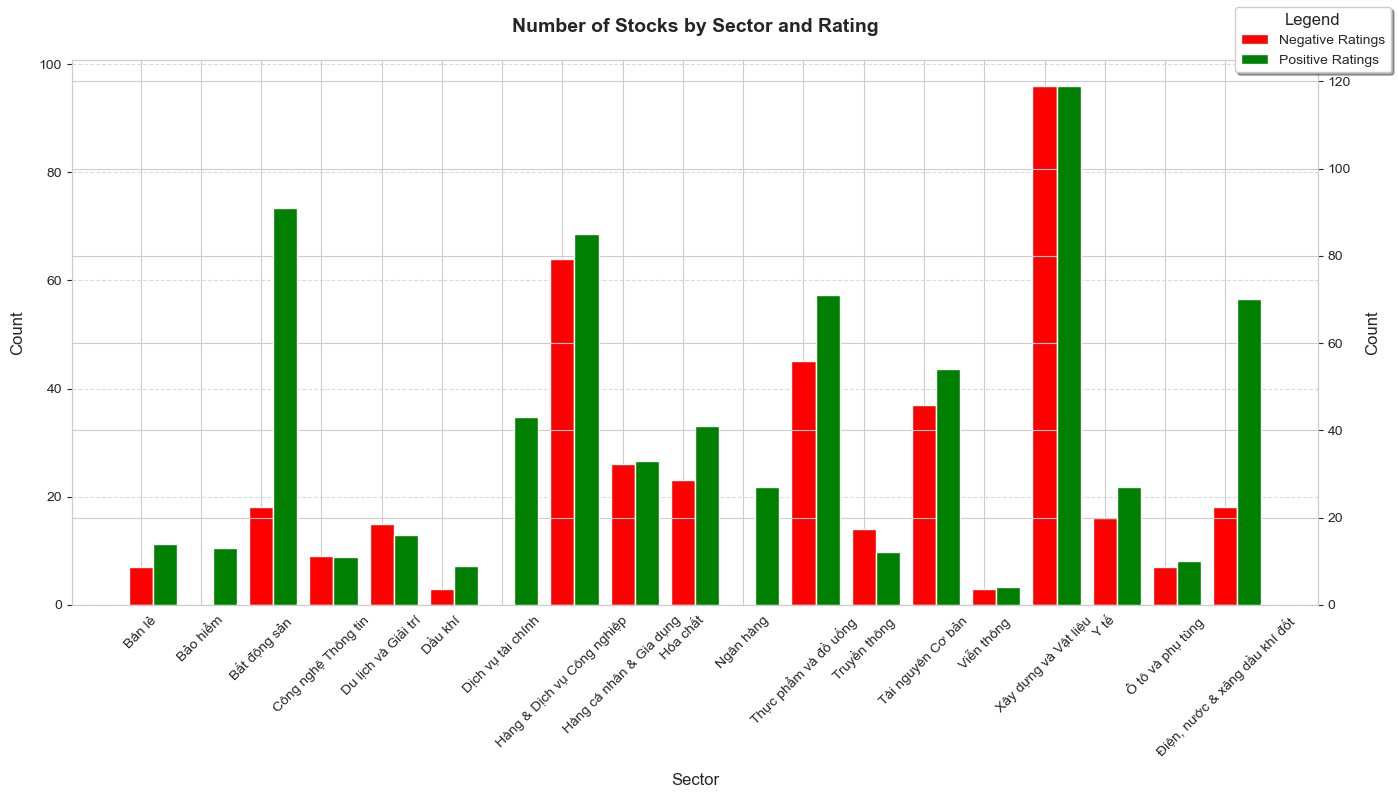

In [ ]:
# Group by 'indus_name' v√† t√≠nh t·ªïng s·ªë m√£ c√≥ r_tcbsrating < 0 cho m·ªói ng√†nh v√† s·ªë m√£ c√≥ r_tcbsrating > 0
sector_ratings = sectors.groupby('indus_name')['r_tcbsrating'].agg(lambda x: (x < 0).sum()).reset_index()
sector_ratings.columns = ['indus_name', 'negative_count']
sector_ratings['positive_count'] = sectors.groupby('indus_name')['r_tcbsrating'].agg(lambda x: (x > 0).sum()).values
sector_ratings

# T·∫°o bi·ªÉu ƒë·ªì
fig, ax = plt.subplots(figsize=(14, 8))

# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt cho s·ªë l∆∞·ª£ng m√£ c√≥ r_tcbsrating < 0
bar_width = 0.4
x = np.arange(len(sector_ratings))
ax.bar(x, sector_ratings['negative_count'], color='r', width=bar_width, label='Negative Ratings')
ax.set_xlabel('Sector', fontsize=12, labelpad=10)
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.set_xticks(x)
ax.set_xticklabels(sector_ratings['indus_name'], fontsize=10)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# T·∫°o tr·ª•c y th·ª© hai cho s·ªë l∆∞·ª£ng m√£ c√≥ r_tcbsrating > 0
ax2 = ax.twinx()
ax2.bar(x + bar_width, sector_ratings['positive_count'], color='g', width=bar_width, label='Positive Ratings')
ax2.set_ylabel('Count', fontsize=12, labelpad=10)
ax2.tick_params(axis='y')

# Th√™m ch√∫ th√≠ch v√† ti√™u ƒë·ªÅ
fig.legend(loc='upper right', fontsize=10, title='Legend', title_fontsize=12, frameon=True, shadow=True)
plt.title('Number of Stocks by Sector and Rating', fontsize=14, weight='bold', pad=20)

# TƒÉng kho
fig.tight_layout()

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

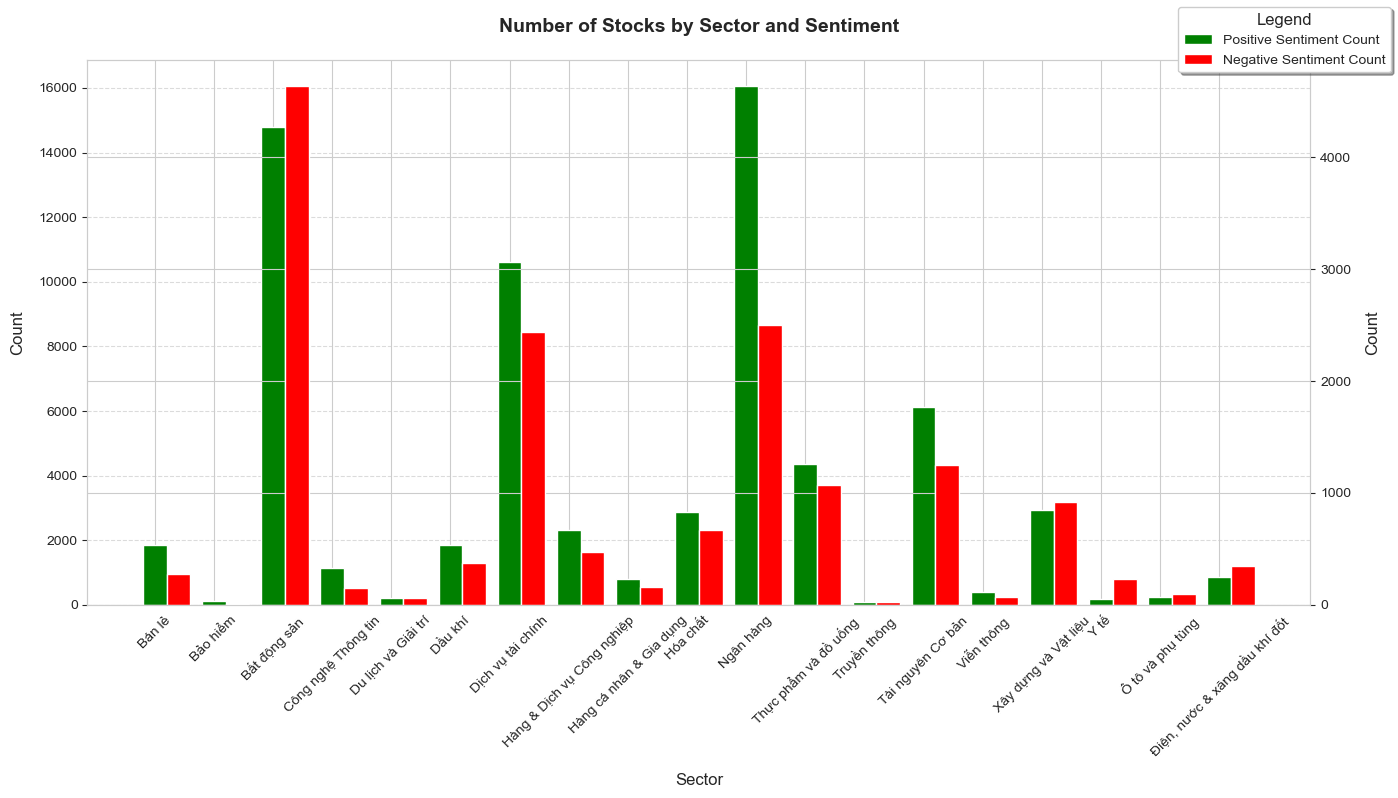

In [67]:
# Merge d·ªØ li·ªáu t·ª´ list_stock.csv ƒë·ªÉ l·∫•y indus_name v√†o result_df 
result_df = result_df.merge(sectors[['symbol', 'indus_name']], left_on='symbol', right_on='symbol', suffixes=('', '_y'))

# Drop the duplicate column
result_df.drop(columns=['indus_name_y'], inplace=True)

# Group by 'indus_name' v√† t√≠nh t·ªïng s·ªë m√£ c√≥ sentiment positive cho m·ªói ng√†nh v√† s·ªë m√£ c√≥ sentiment negative
sector_sentiments = result_df.groupby('indus_name')['positive'].sum().reset_index()
sector_sentiments.columns = ['indus_name', 'positive_count']
sector_sentiments['negative_count'] = result_df.groupby('indus_name')['negative'].sum().values
sector_sentiments

# T·∫°o bi·ªÉu ƒë·ªì
fig, ax = plt.subplots(figsize=(14, 8))

# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt cho s·ªë l∆∞·ª£ng m√£ c√≥ sentiment positive
bar_width = 0.4
x = np.arange(len(sector_sentiments))

# Positive sentiment bars
ax.bar(x, sector_sentiments['positive_count'], color='g', width=bar_width, label='Positive Sentiment Count')
ax.set_xlabel('Sector', fontsize=12, labelpad=10)
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.set_xticks(x)
ax.set_xticklabels(sector_sentiments['indus_name'], fontsize=10)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Negative sentiment bars
ax2 = ax.twinx()
ax2.bar(x + bar_width, sector_sentiments['negative_count'], color='r', width=bar_width, label='Negative Sentiment Count')
ax2.set_ylabel('Count', fontsize=12, labelpad=10)
ax2.tick_params(axis='y')

# Th√™m ch√∫ th√≠ch v√† ti√™u ƒë·ªÅ
fig.legend(loc='upper right', fontsize=10, title='Legend', title_fontsize=12, frameon=True, shadow=True)
plt.title('Number of Stocks by Sector and Sentiment', fontsize=14, weight='bold', pad=20)

# TƒÉng kho
fig.tight_layout()

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()